# Avacado Project
### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


**Inspiration /Label**

Your task is to make a mode that can consider the data provided and predict the Average Price.

# First we will import all important libraries.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('avocado.csv')
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# Exploratory Data Analysis

In [8]:
data.shape

(18249, 14)

In [6]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We have loaded the dataset and did some basic data analysis and we found:
* Our Evocado Dataset has 14 columns and 18249 rows.
* Our Evocado Dataset has no missing values.
* Our Datset has 3 object data type columns, (1)Date, (2)type, (3)region. Apart from this there is 2 integer data type columns and rest of columns are float data type.
* So our very first task would be extracting date month and year from Date column than we will encode the type and region column.

### Extracting Dates from Date column

In [16]:
# defining date column to pandas inbuilt to_datetime function with errors = 'coerce' if conversion fails than particular row will be NaT
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')

In [22]:
# extracting date month and year from Date column
data['Years'] = data['Date'].dt.year
data['Months'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [23]:
data

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  Years  Months  Day  
0      2015            Albany   2015      12   27  
1      2015            Albany   2015      12   20  
2      2015            Albany   2015      12   13  
3      2015            Albany   2015      12    6  
4      2015            Albany   2015      11   29  
...     ...               ...    ...     ...  ...  
18244  2018  WestTexNewMexico   2018       2    4  
18245  2018  WestTexNewMexico   2018       1   28  
18246  2018  WestTexNewMexico   2018       1   21  
18247  2018  WestTexNewMexico   2018       1   14  
18248  2018  WestTexNewMexico   2018       1    7  

[18249 rows x 17 columns]

Date, Month and Day has been extracted from the Date column, now we have 2 years column, in dataset there was already a column as year so After extracting the each date saperately we have 2 year column so we are going to compare both of the years columns and if found same we will drop one and also we will drop Date column as we don't need this now.

In [24]:
data['year'].describe()

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64

In [25]:
data['Years'].describe()

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: Years, dtype: float64

We found both the column of year is same and we are going to drop one with Date column.

In [27]:
data = data.drop(columns = ['Date', 'year'])

In [28]:
data.shape

(18249, 15)

In [29]:
data

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0         8696.87     8603.62       93.25          0.0  conventional   
1         9505.56     9408.07       97.49          0.0  conventional   
2         8145.35     8042.21      103.14          0.0  conventional   
3         5811.16     5677.40      133.76          0.0  conventional   
4         6183.95     5986.26      197.69          0.0  conventional   
...           ...         ...         ...          ...           ...   
18244    13498.67    13066.82      431.85          0.0       organic   
18245     9264.84     8940.04      324.80          0.0       organic   
18246     9394.11     9351.80       42.31          0.0       organic   
18247    10969.54    10919.54       50.00          0.0       organic   
18248    12014.15    11988.14       26.01          0.0       organic   

                 region  Years  Months  Day  
0                Albany   2015      12   27  
1                Albany   2015      12   20  
2                Albany   2015      12   13  
3                Albany   2015      12    6  
4                Albany   2015      11   29  
...                 ...    ...     ...  ...  
18244  WestTexNewMexico   2018       2    4  
18245  WestTexNewMexico   2018       1   28  
18246  WestTexNewMexico   2018       1   21  
18247  WestTexNewMexico   2018       1   14  
18248  WestTexNewMexico   2018       1    7  

[18249 rows x 15 columns]

**Unnamed Column**

In our dataset the very first column is with the name of unnamed and we found that it is some short of seriel no. but upto some extancts it stops and repeats again upto some different extantcs, so later I found in problem statement that this dataset is a table of multi outlet retail sales data, so I guessed that it is an index number of different different outlets in different different region resepctively. So this column does not play any role in terms of Avocado retail sales or price so we have decided to drop this column.

**XLarge Bags Column**
In our data set there is a column seems to have value as 0.0 in each row will be of no use we will cross check for this column and found it True we will drop both the columns what we discussed here.

In [30]:
data['XLarge Bags'].describe()

count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64

In [31]:
data['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
9.95            1
3.47            1
59.32           1
16090.51        1
4920.17         1
Name: XLarge Bags, Length: 5588, dtype: int64

In **XLarge Bags** column there is 0 value in 12048 rows but having some other values as well so we will not drop this column.

In [33]:
data = data.drop(columns = ['Unnamed: 0'])

In [34]:
data.shape

(18249, 14)

Now we have 2 object data type columns that is **type** & **region**. We have to encode these columns or our Machine Learning Algorithms.

### Encoding of Object Data Type Columns.

#### Column = 'type':

In [35]:
data['type'].describe()

count            18249
unique               2
top       conventional
freq              9126
Name: type, dtype: object

In [36]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

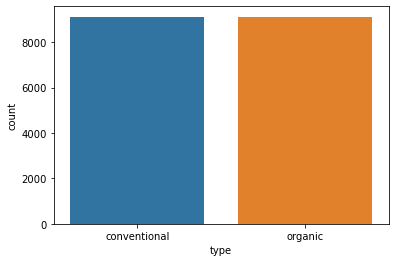

In [39]:
sns.countplot(data['type'])

In [40]:
lab_enc = LabelEncoder()
data['type'] = lab_enc.fit_transform(data['type'])

#### Column = 'region':

In [41]:
data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type            region  Years  \
0         8603.62       93.25          0.0     0            Albany   2015   
1         9408.07       97.49          0.0     0            Albany   2015   
2         8042.21      103.14          0.0     0            Albany   2015   
3         5677.40      133.76          0.0     0            Albany   2015   
4         5986.26      197.69          0.0     0            Albany   2015   
...           ...         ...          ...   ...               ...    ...   
18244    13066.82      431.85          0.0     1  WestTexNewMexico   2018   
18245     8940.04      324.80          0.0     1  WestTexNewMexico   2018   
18246     9351.80       42.31          0.0     1  WestTexNewMexico   2018   
18247    10919.54       50.00          0.0     1  WestTexNewMexico   2018   
18248    11988.14       26.01          0.0     1  WestTexNewMexico   2018   

       Months  Day  
0          12   27  
1          12   20  
2          12   13  
3          12    6  
4          11   29  
...       ...  ...  
18244       2    4  
18245       1   28  
18246       1   21  
18247       1   14  
18248       1    7  

[18249 rows x 14 columns]

In [42]:
data['region'].describe()

count          18249
unique            54
top       California
freq             338
Name: region, dtype: object

<AxesSubplot:xlabel='region', ylabel='Density'>

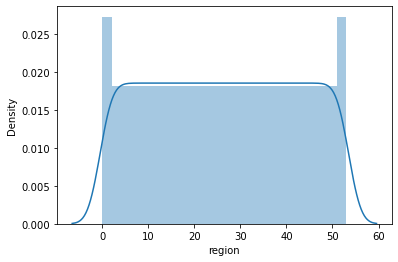

In [183]:
sns.distplot(data['region'])

In [44]:
data['region'] = lab_enc.fit_transform(data['region'])

<AxesSubplot:xlabel='region', ylabel='Density'>

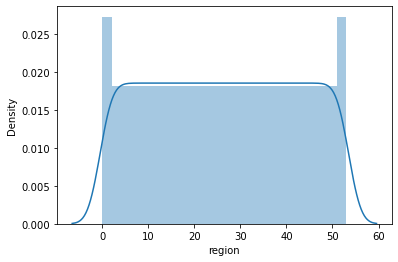

In [45]:
sns.distplot(data['region'])

Our first Task of Data cleaning is done, under it we have done:
* Extracted the dates from Date Column in Years Months and Day columns respectively.
* Drpped the unnecessary columns.
* Encoded the Object Data Type Columns.

Now we will visualize the data for further analysys.

In [46]:
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

             region         Years        Months           Day  
count  18249.000000  18249.000000  18249.000000  18249.000000  
mean      26.495644   2016.147899      6.177215     15.662612  
std       15.583788      0.939938      3.534130      8.776281  
min        0.000000   2015.000000      1.000000      1.000000  
25%       13.000000   2015.000000      3.000000      8.000000  
50%       26.000000   2016.000000      6.000000     16.000000  
75%       40.000000   2017.000000      9.000000     23.000000  
max       53.000000   2018.000000     12.000000     31.000000

## Data Visualization

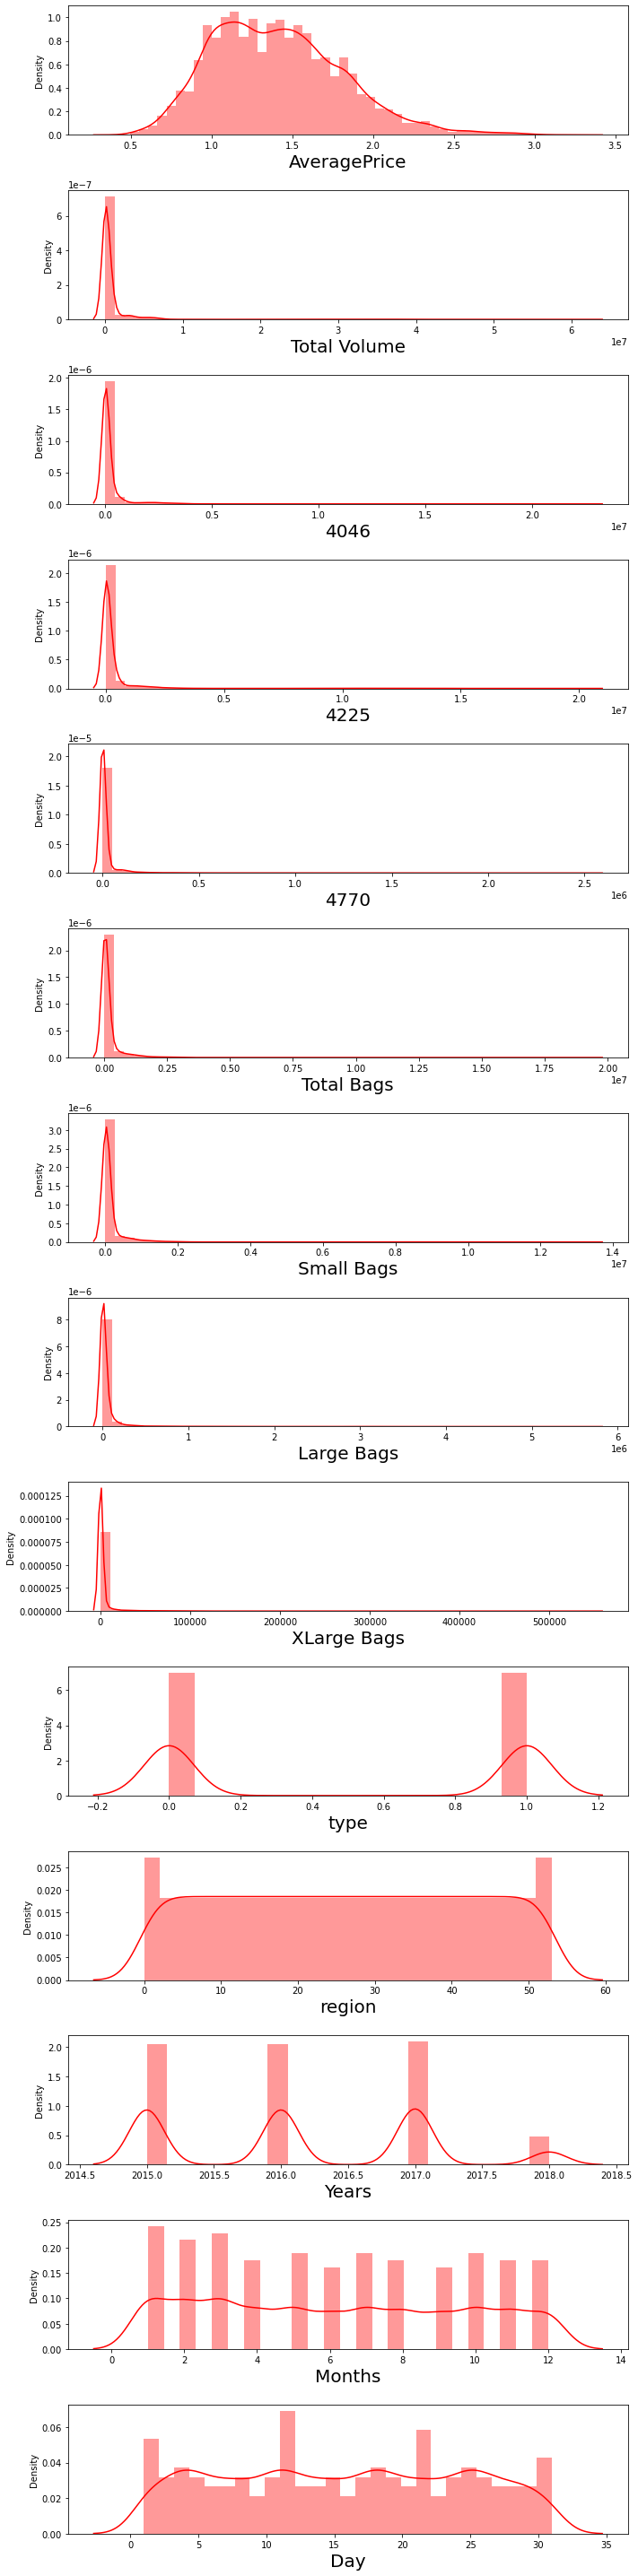

In [59]:
# for loop for distribution plot of all columns
plt.figure(figsize = (10,40))
plotnumber = 1
for columns in data:
    if plotnumber<=14:
        ax = plt.subplot(14,1,plotnumber)
        sns.set_style = 'whitegrid'
        sns.distplot(data[columns], color = 'red')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

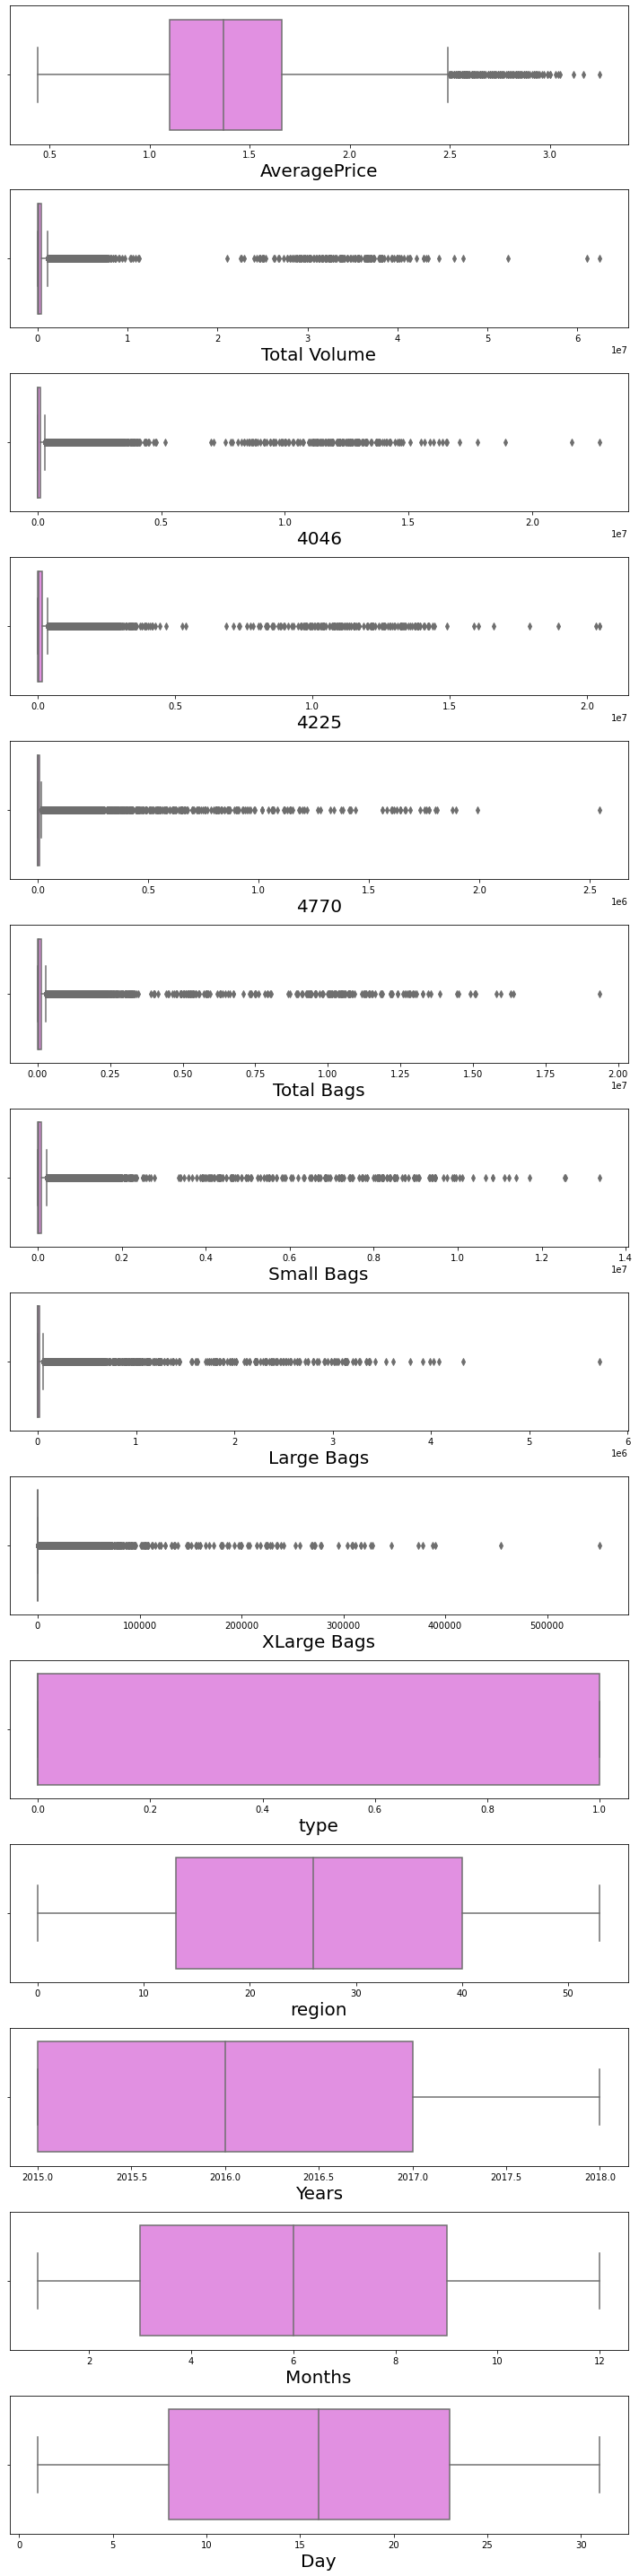

In [57]:
# for loop for boxplot of all columns
plt.figure(figsize = (10,40))
plotnumber = 1
for columns in data:
    if plotnumber<=14:
        ax = plt.subplot(14,1,plotnumber)
        sns.set_style = 'whitegrid'
        sns.boxplot(data[columns], color = 'violet')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

From above visualization of data(distribution plot & box pot) if we leave categorical columns(type & region) and date columns(day, month & years) all the column's data is highly messed. we have so many outliers in all the columns that if we are going to remove them by zscore or IQR, we are going to loose very much data. So we will try to remove skewness by power transform.

But First let's check the regression plot of the data with target column **AveragePrice**.

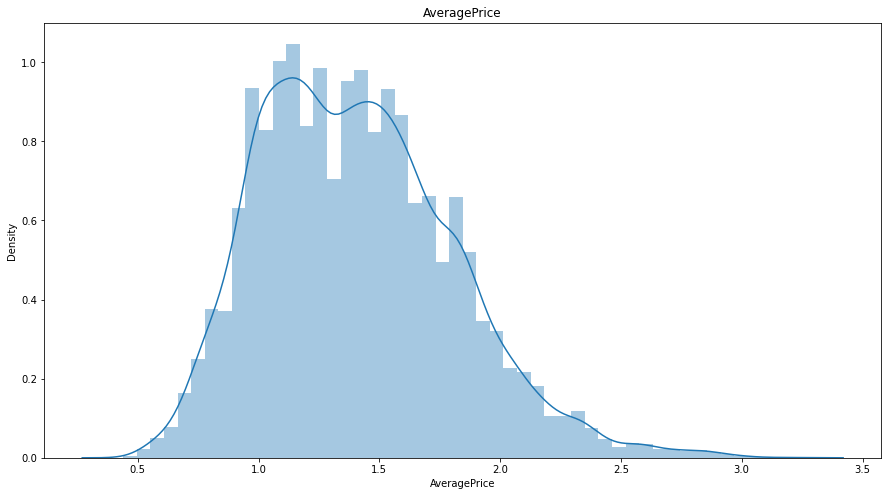

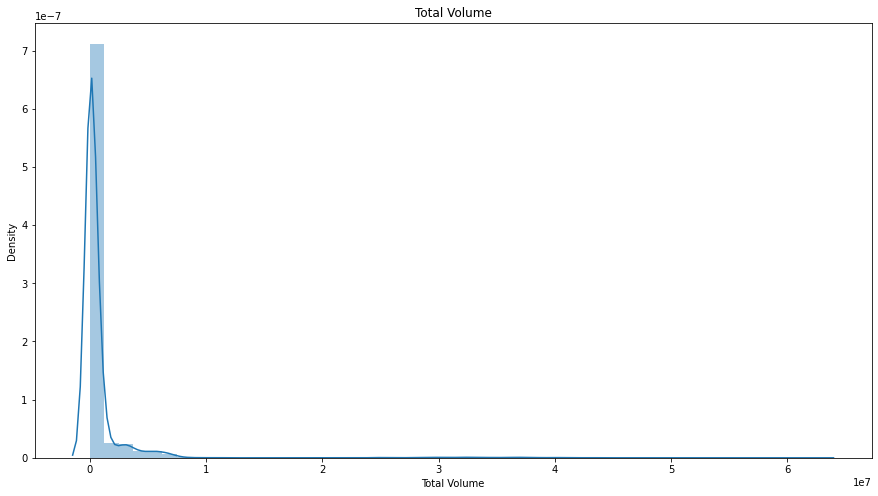

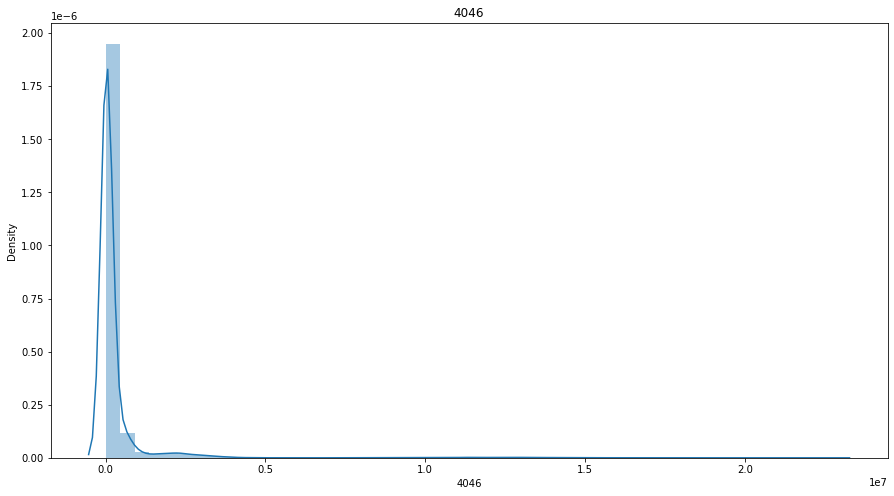

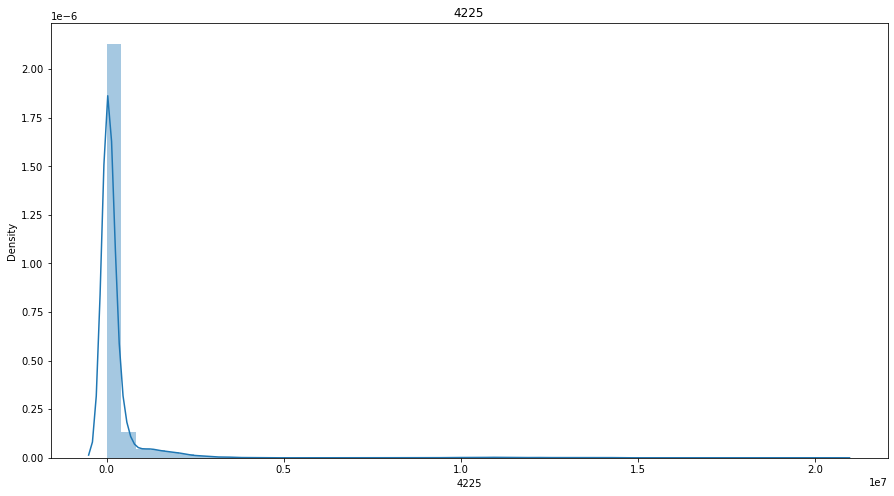

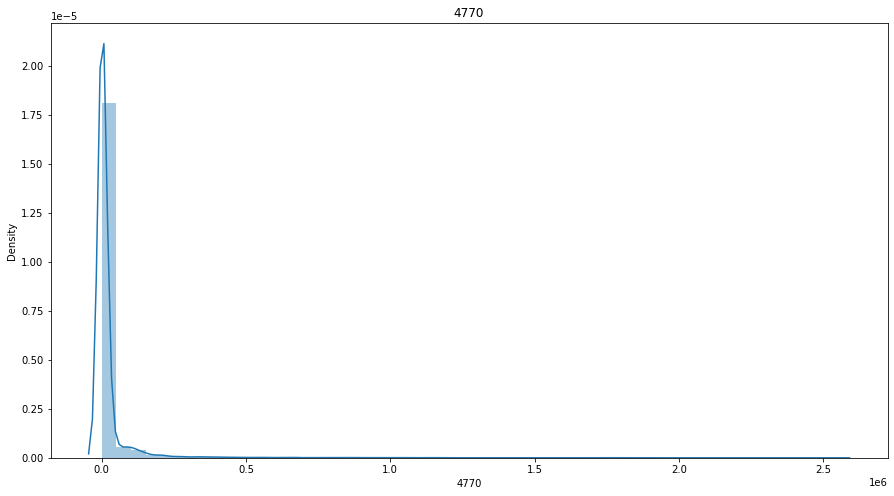

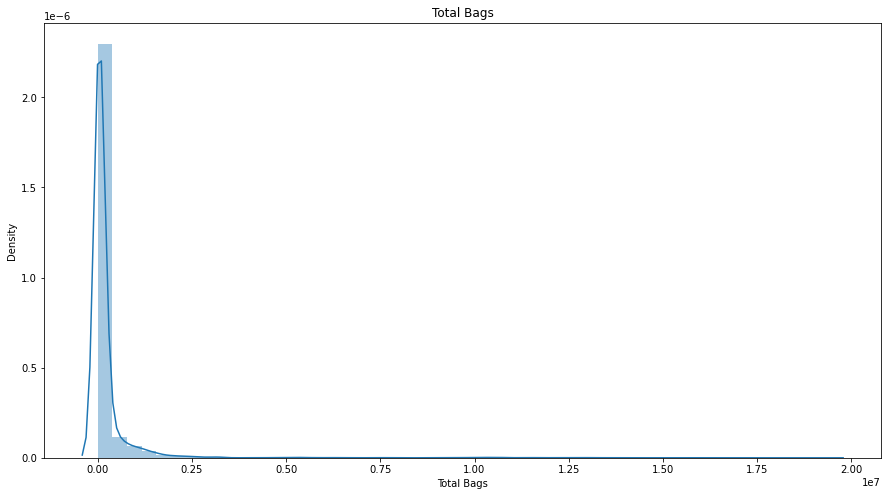

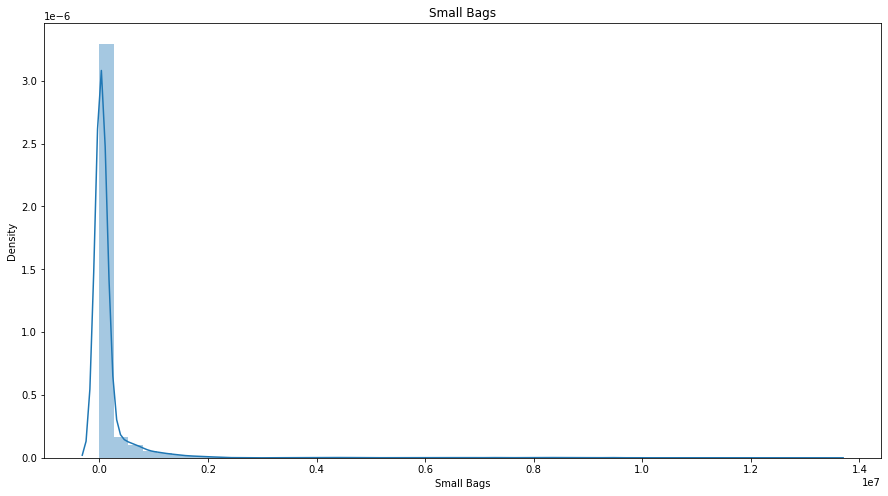

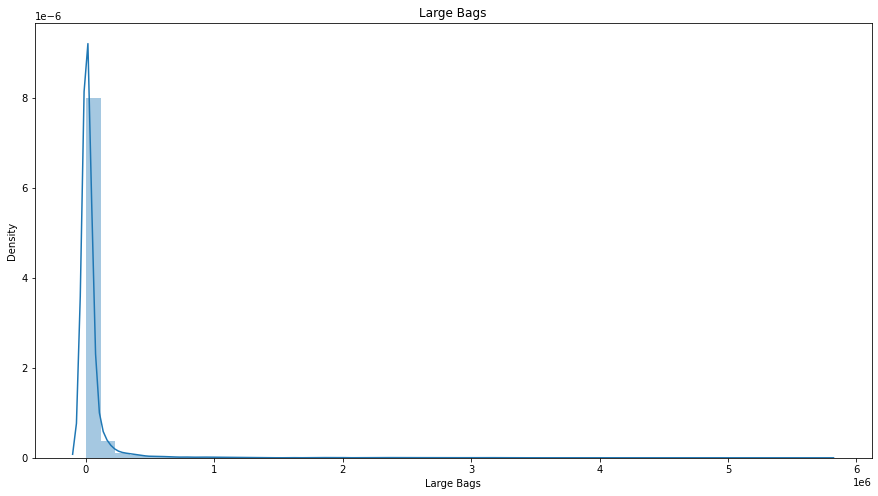

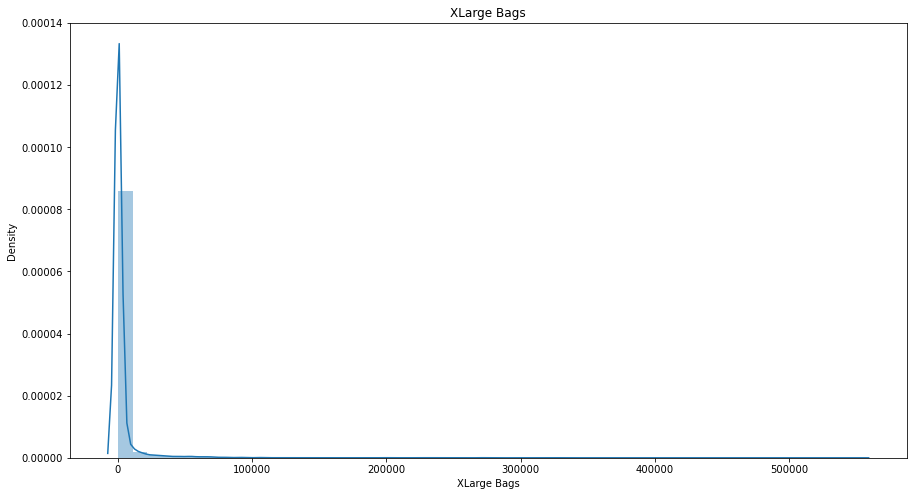

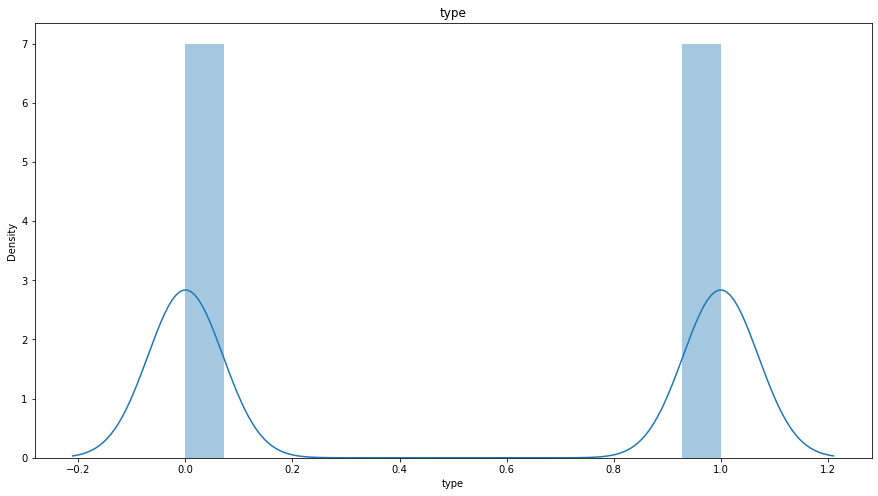

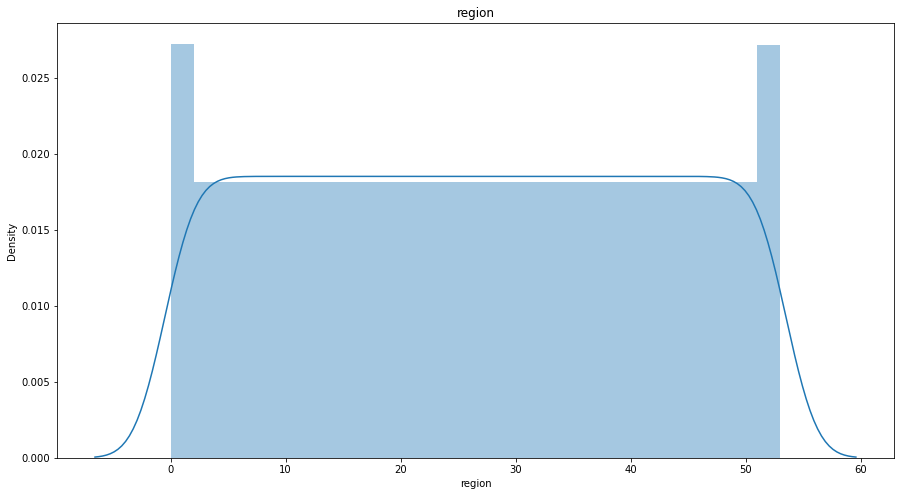

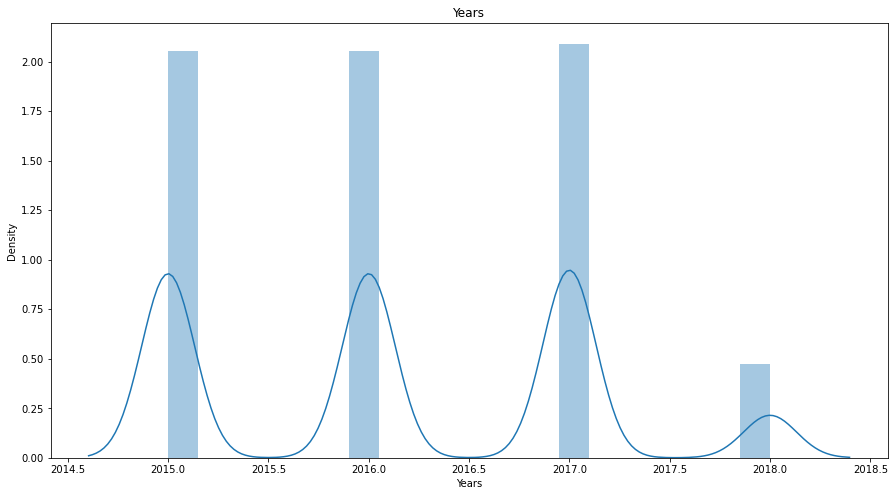

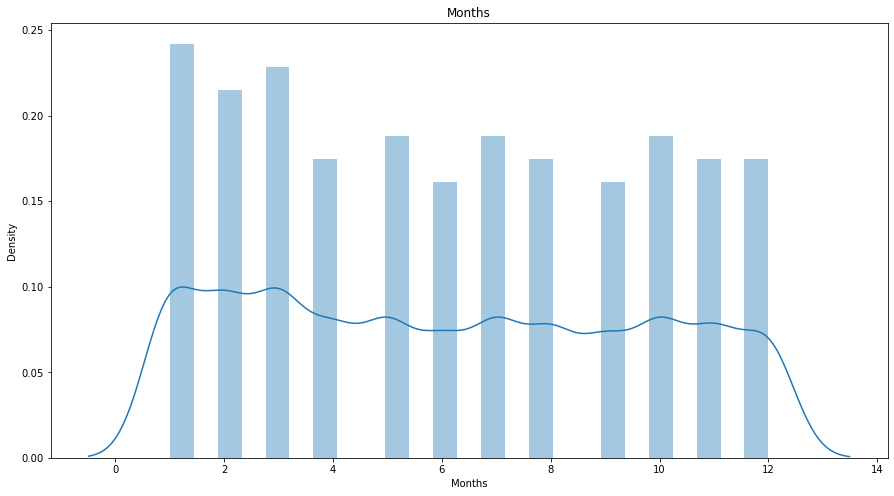

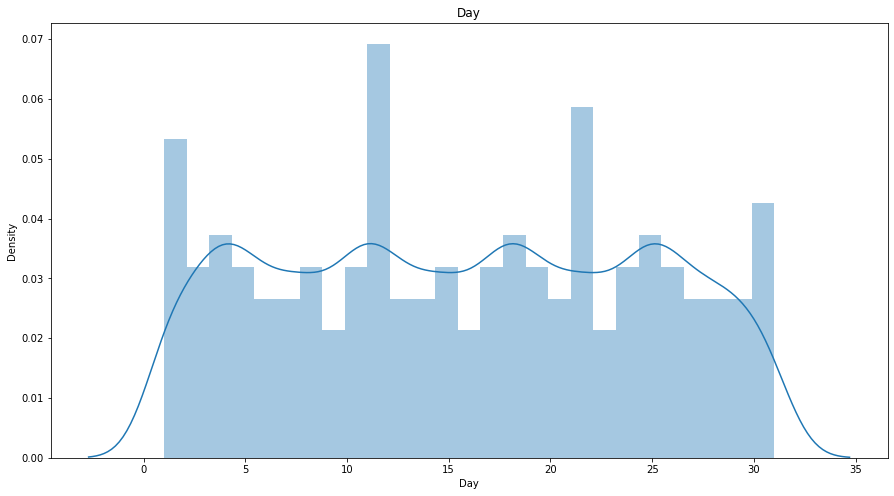

In [60]:
for i in data.columns:
    plt.figure(figsize = (15,8))
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

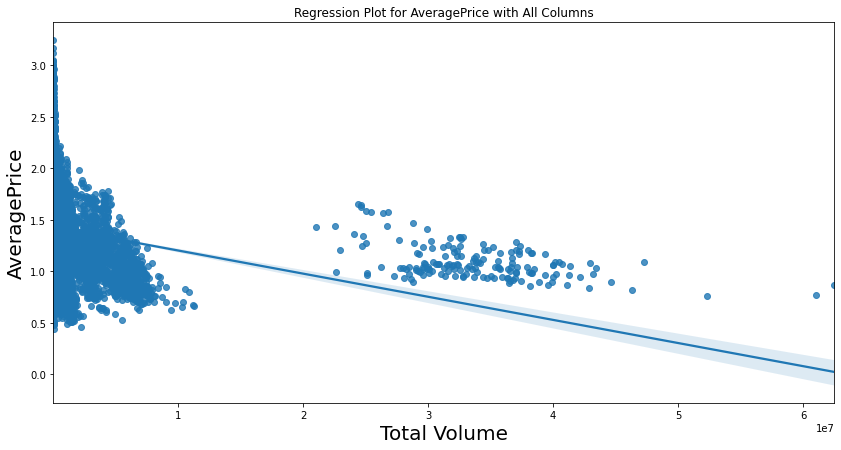

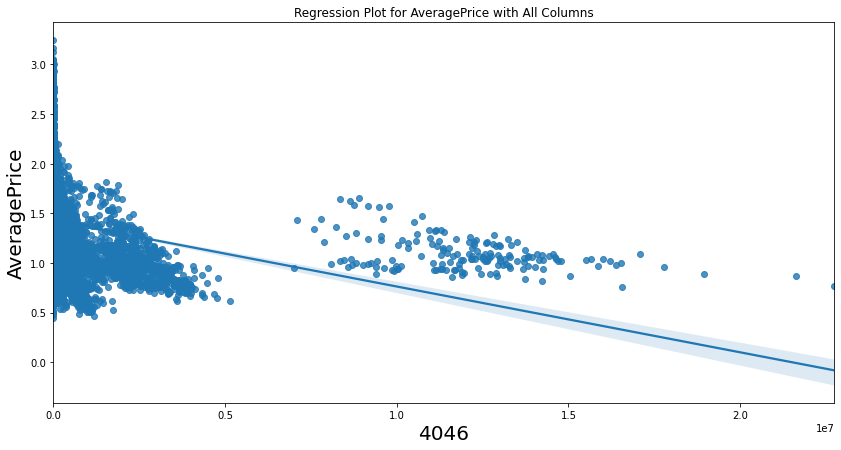

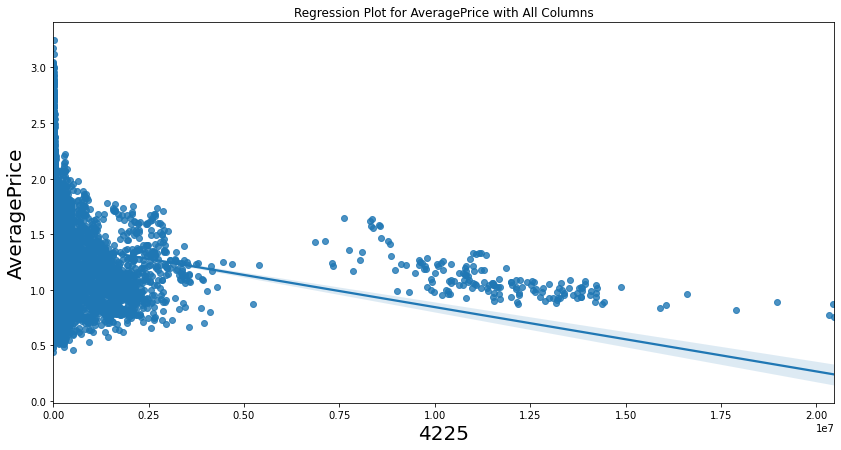

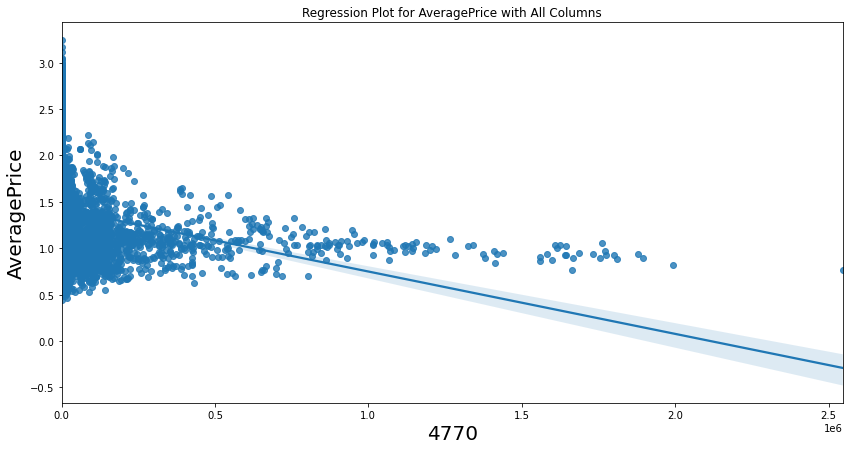

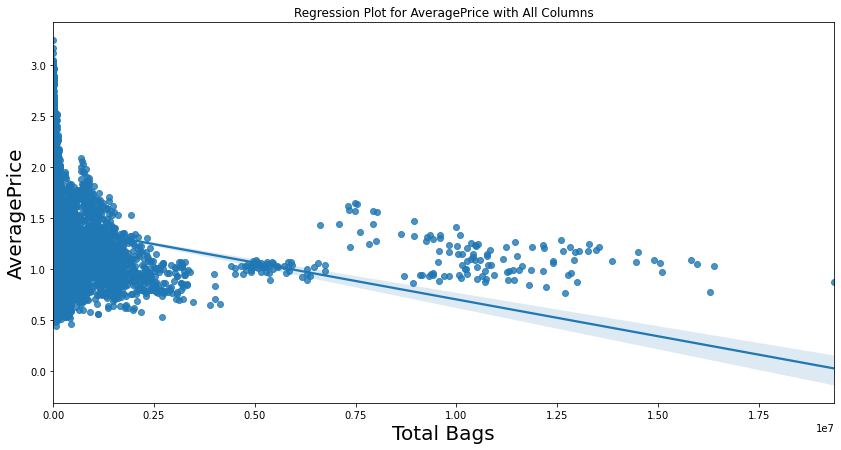

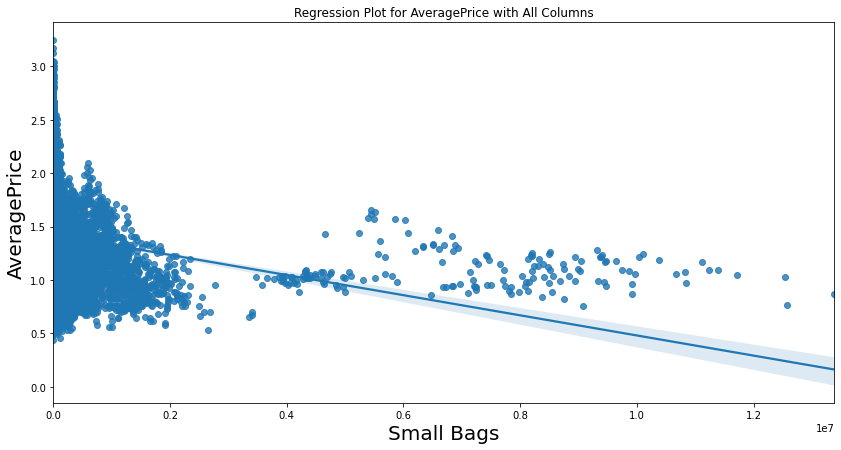

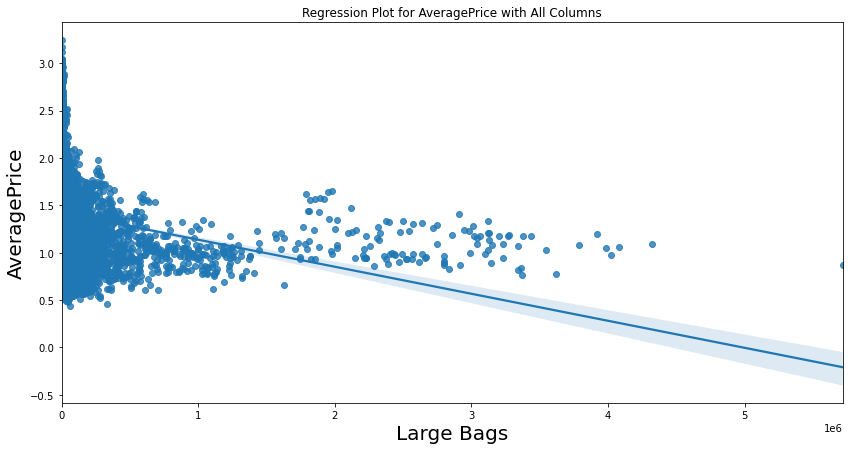

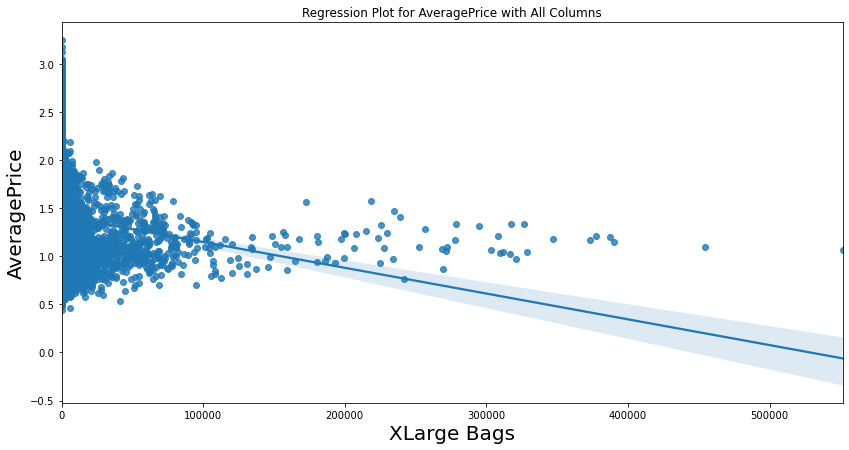

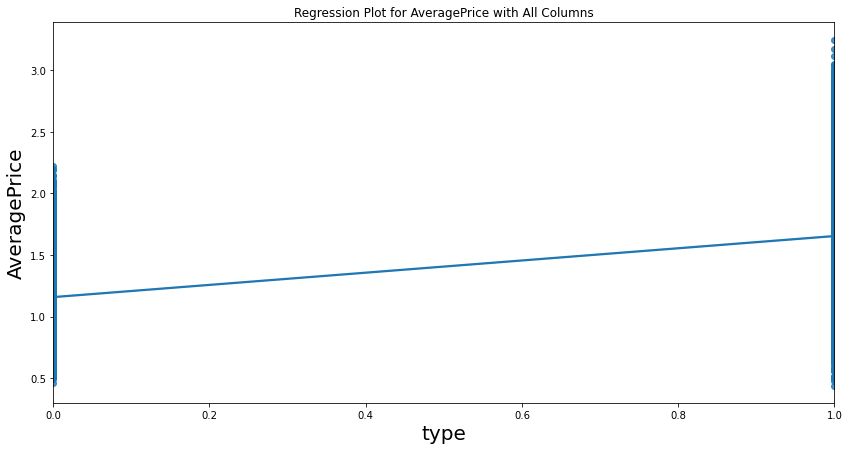

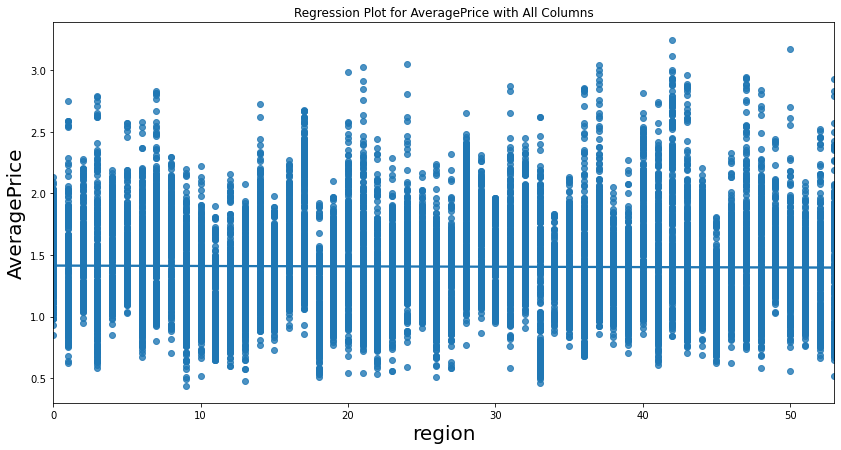

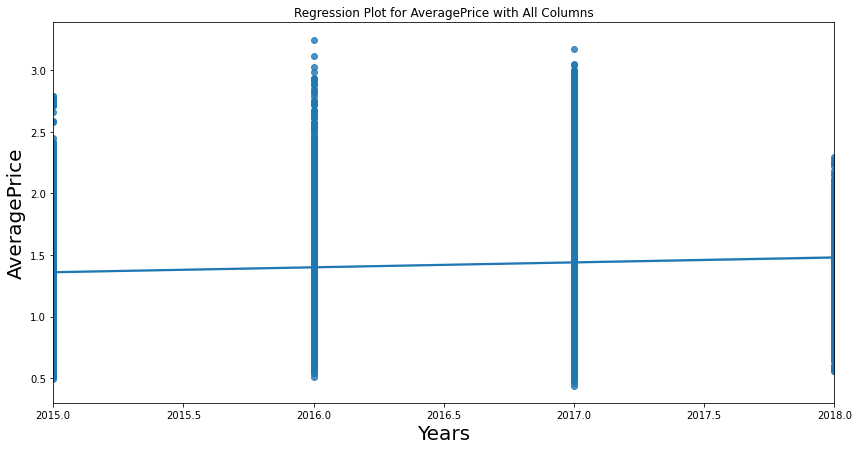

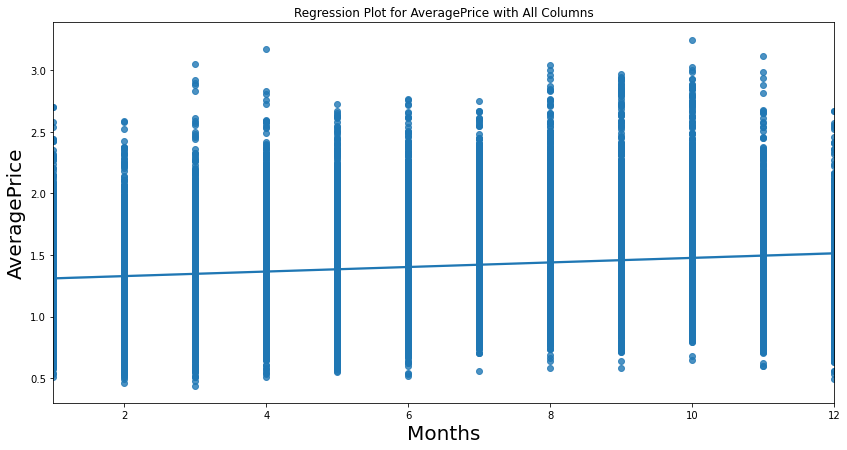

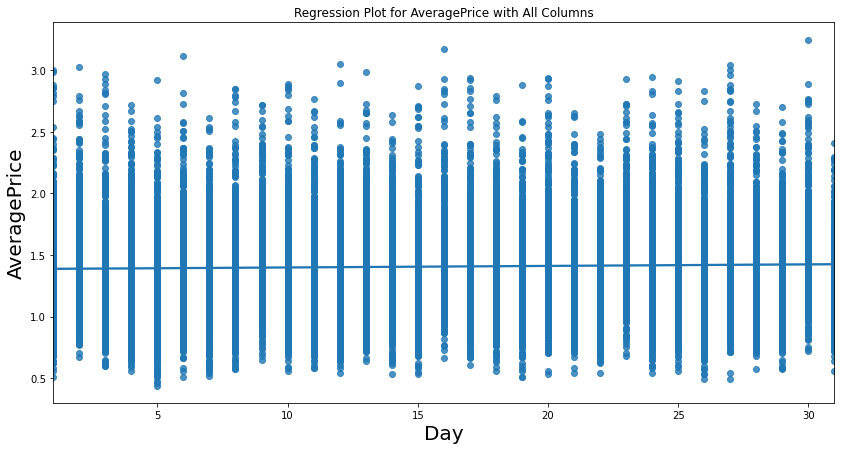

In [65]:
# for loop for reg plot of AveragePrice with all other columns
for i in data.columns[1:]:
    plt.figure(figsize = (14,7))
    sns.regplot(data[i], data['AveragePrice'])
    plt.title('Regression Plot for AveragePrice with All Columns')
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('AveragePrice', fontsize = 20)
    plt.show()

In above regression plot all the continuous columns is showing inverse linear relations with AveragePrice column and we can see that very few data point are on linear line. maximum of data points are away from linear line. We need to fix the skewness of data in all continuous columns.

## Removing Skewness with Power Transformer.

In [66]:
# importing power_transform
from sklearn.preprocessing import power_transform

In [67]:
# spliting the data into features and label
x = data.drop(columns = ['AveragePrice'])
y = data['AveragePrice']

In [69]:
x_new = power_transform(x, method = 'yeo-johnson')
x_new = pd.DataFrame(x_new, columns = x.columns)
x = x_new

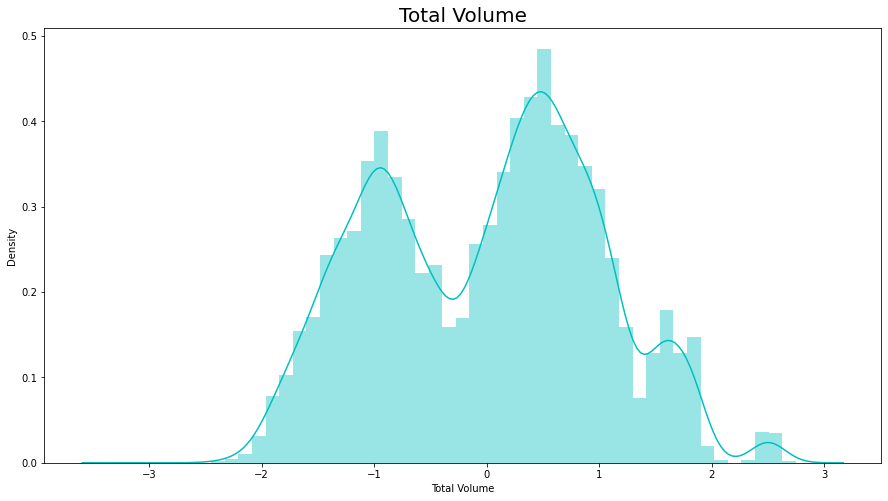

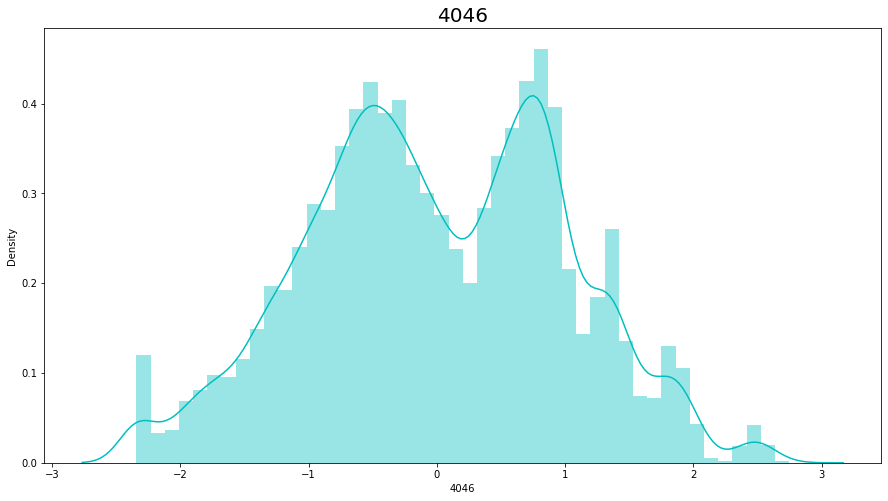

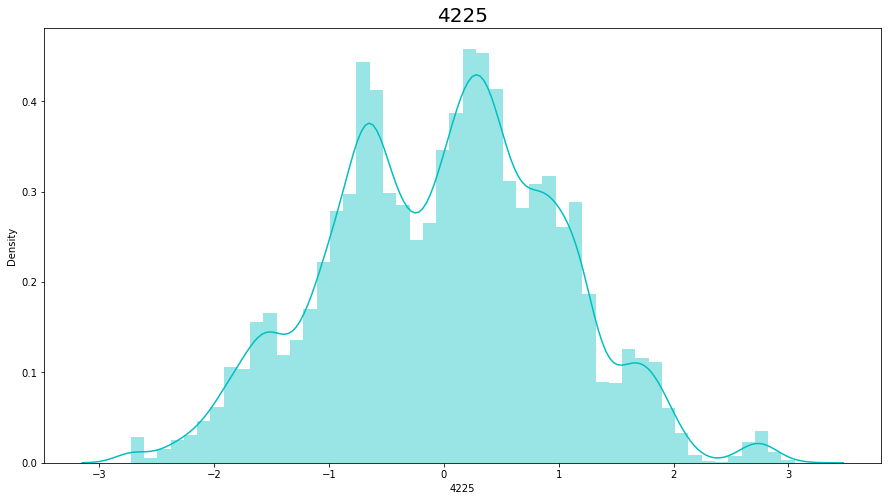

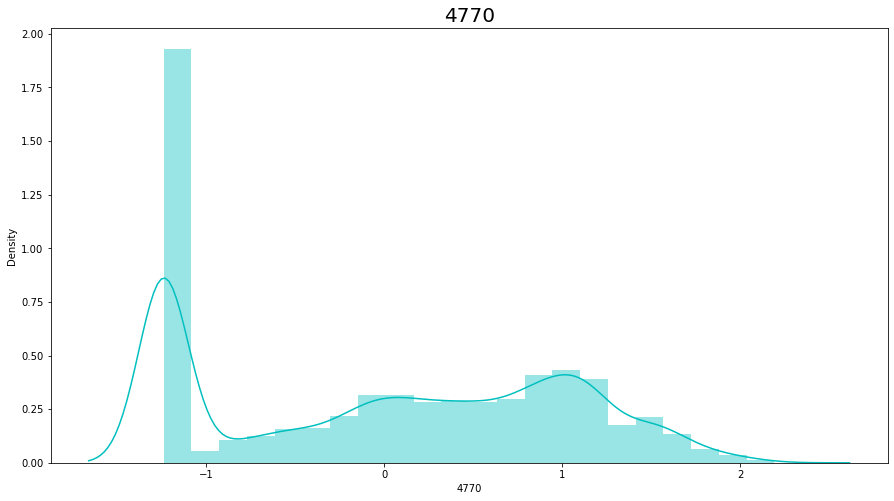

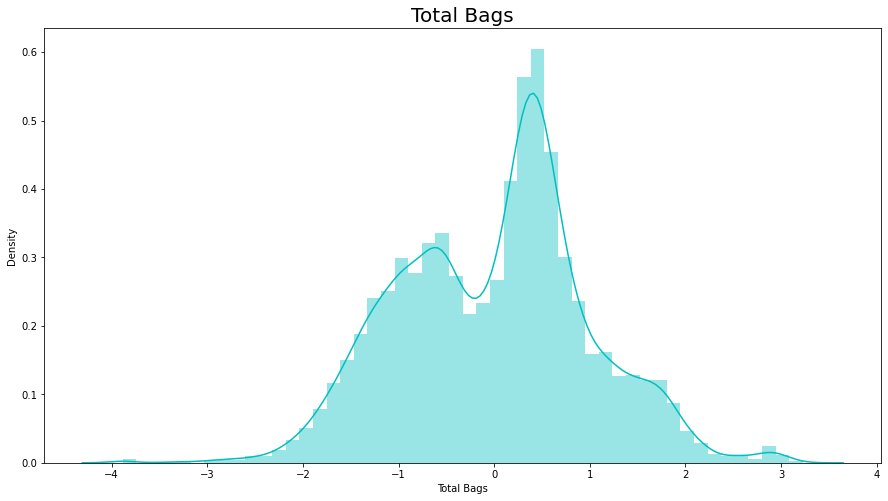

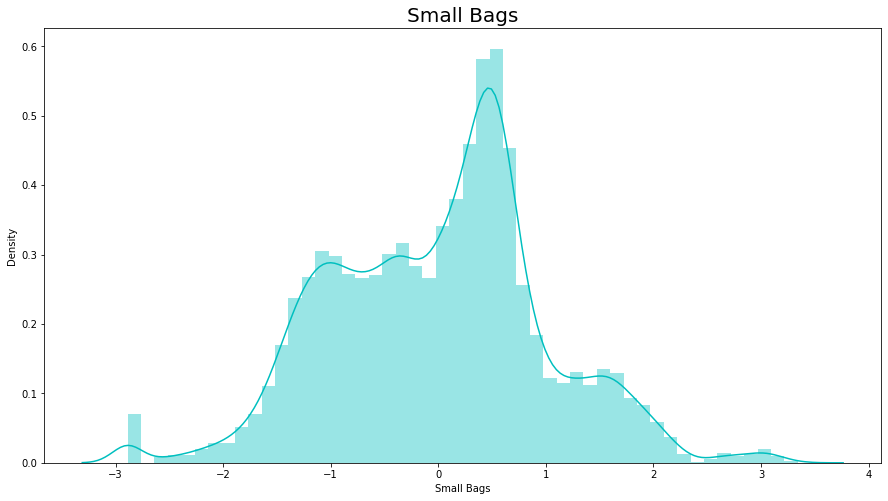

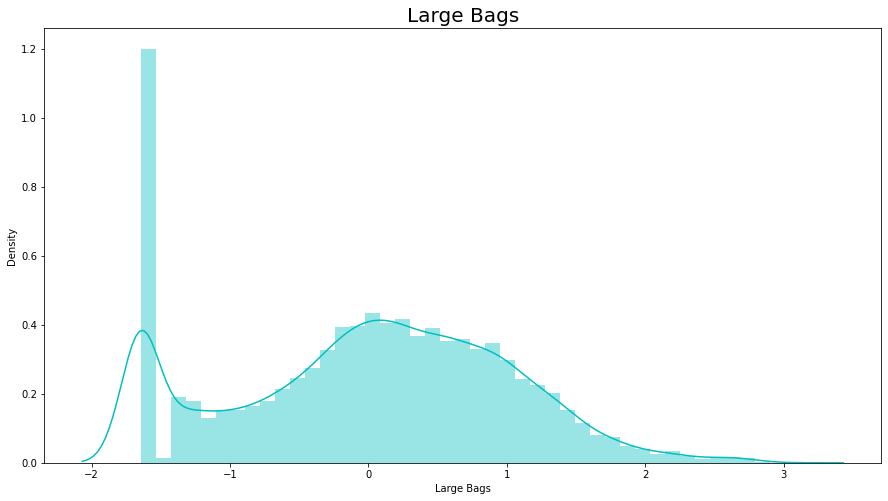

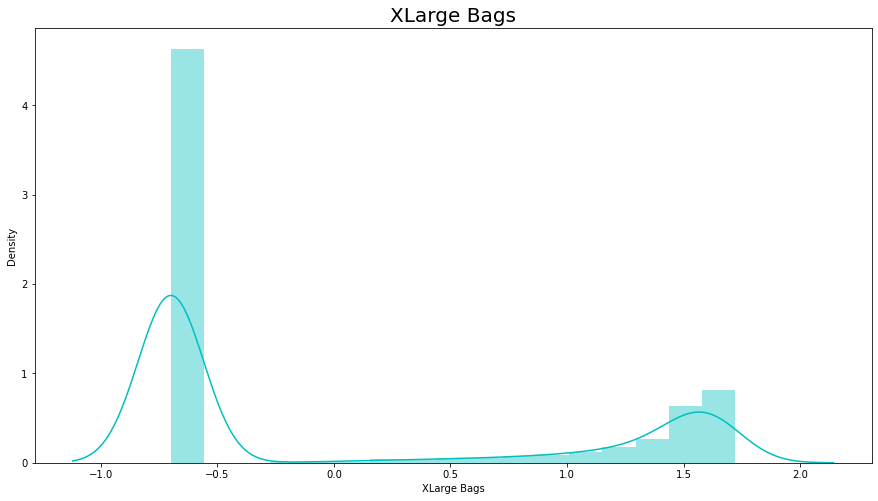

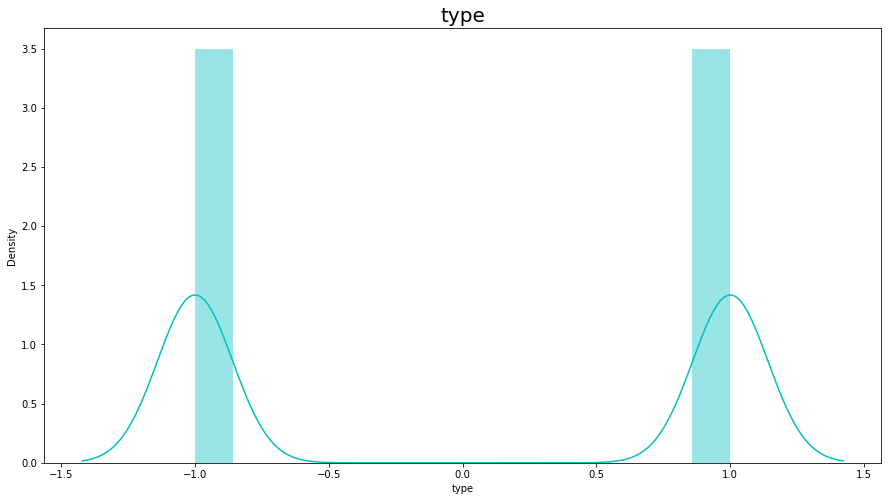

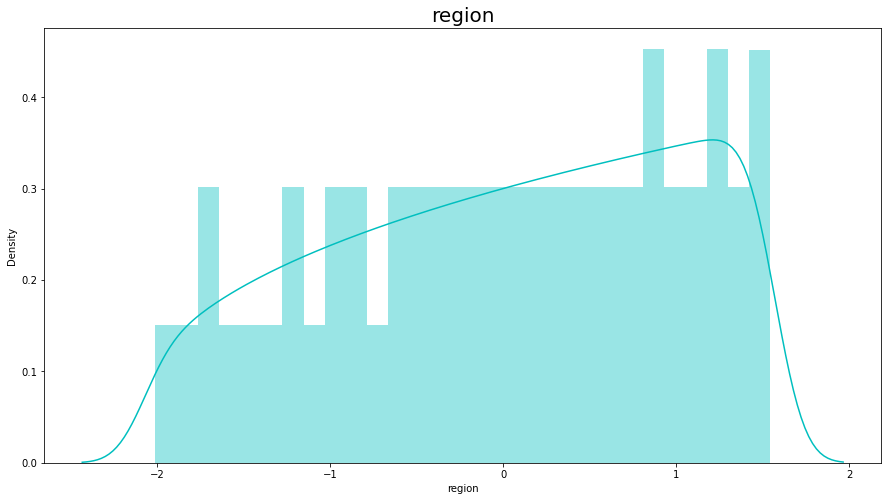

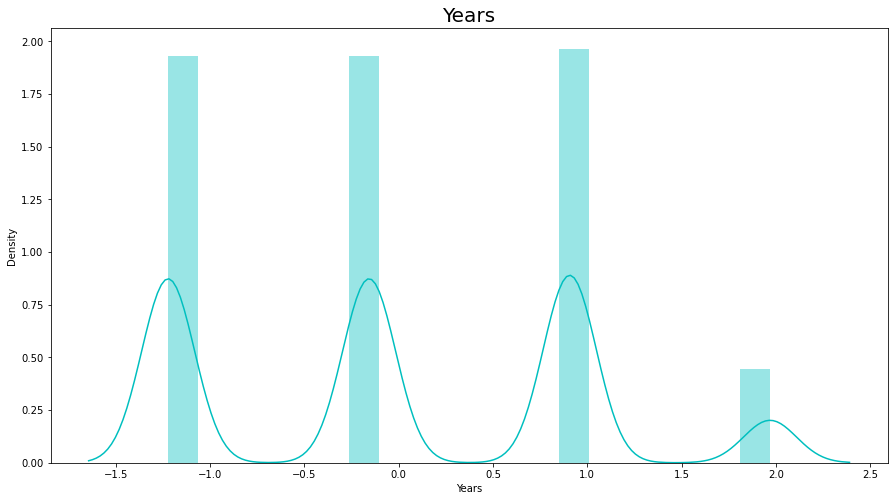

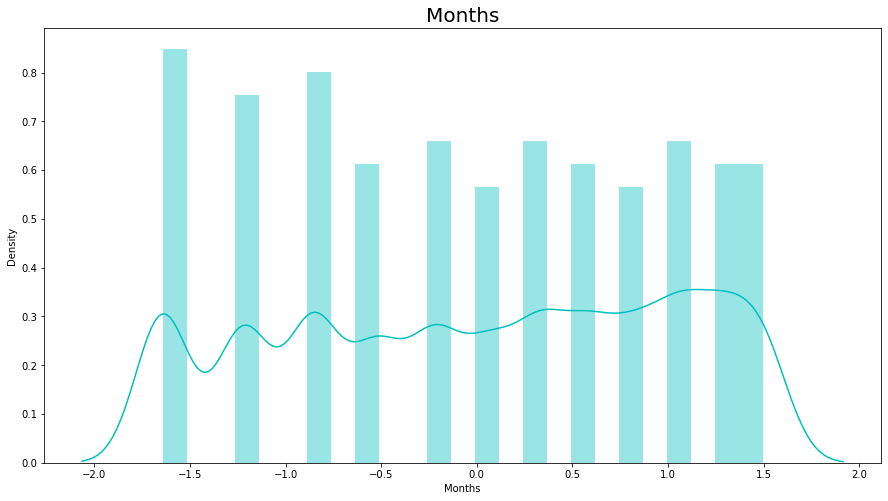

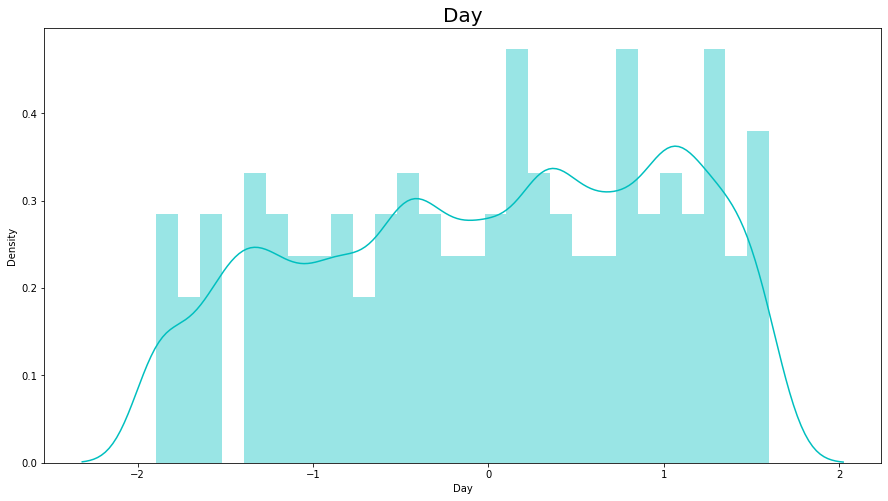

In [71]:
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.distplot(x[i], color = 'c')
    plt.title(i, fontsize = 20)
    plt.show()

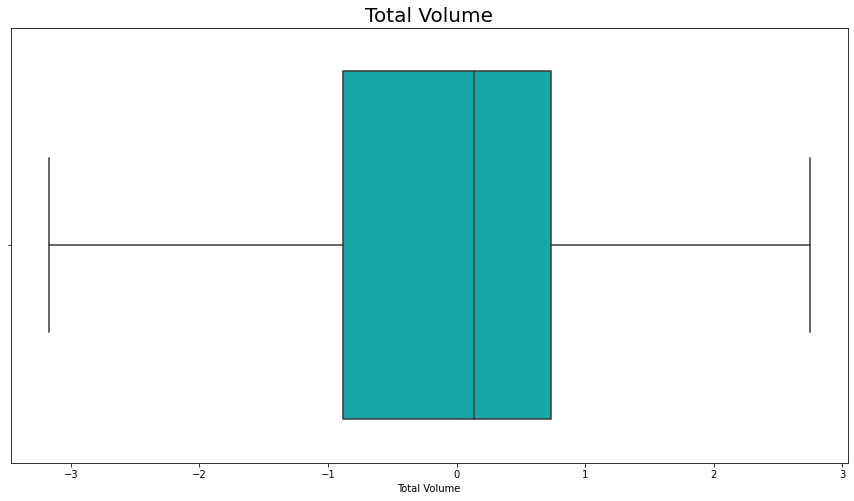

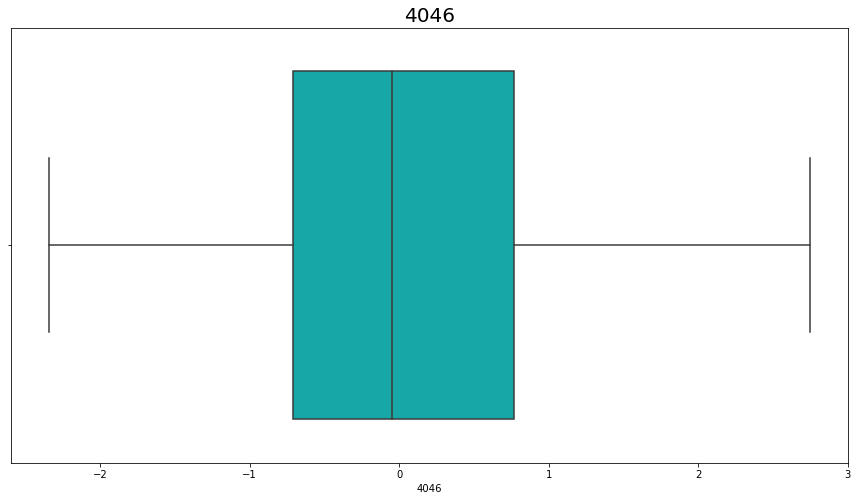

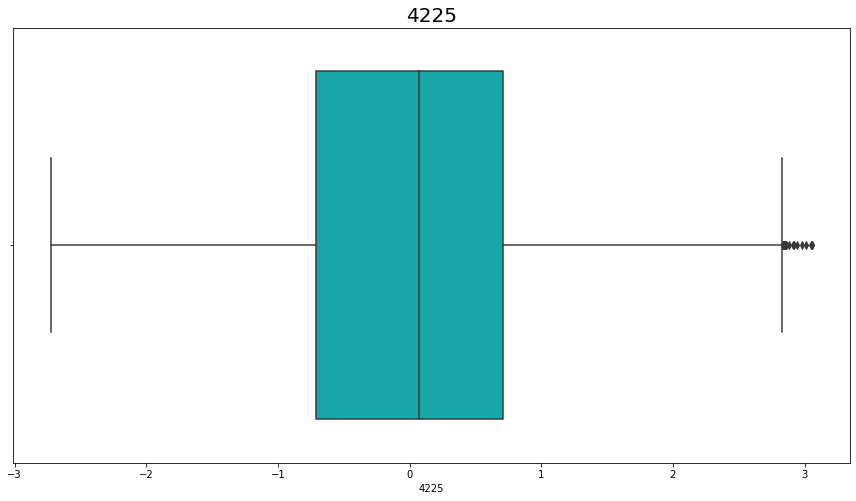

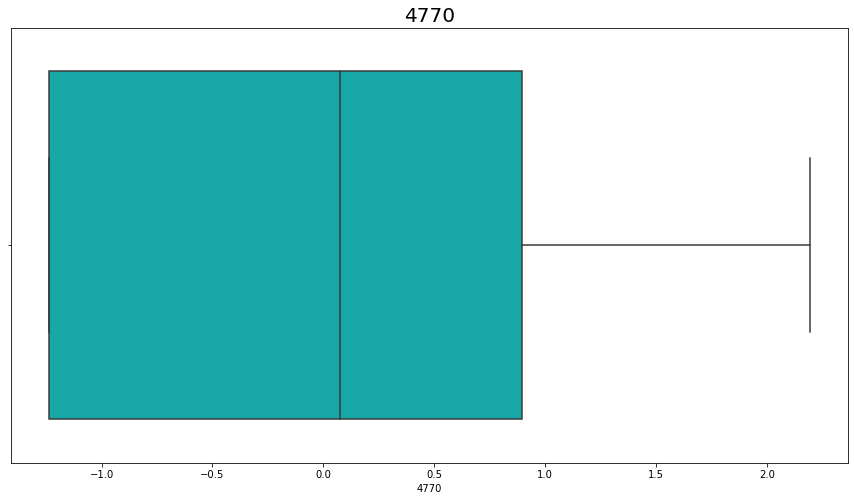

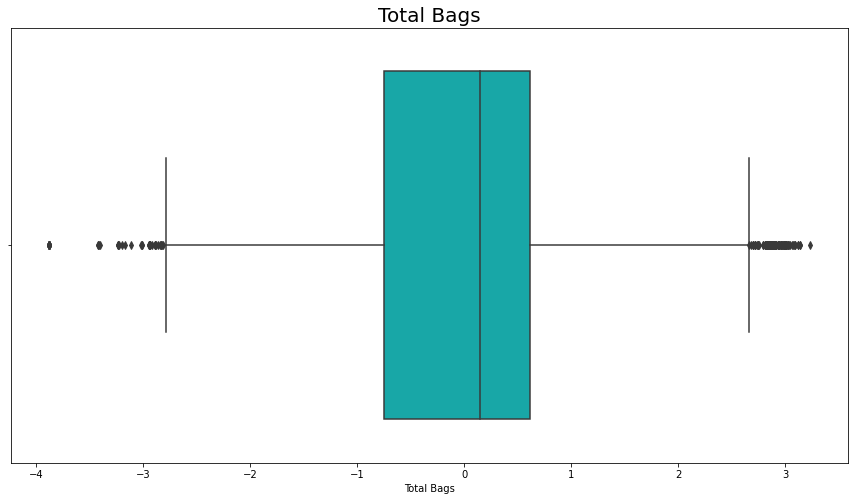

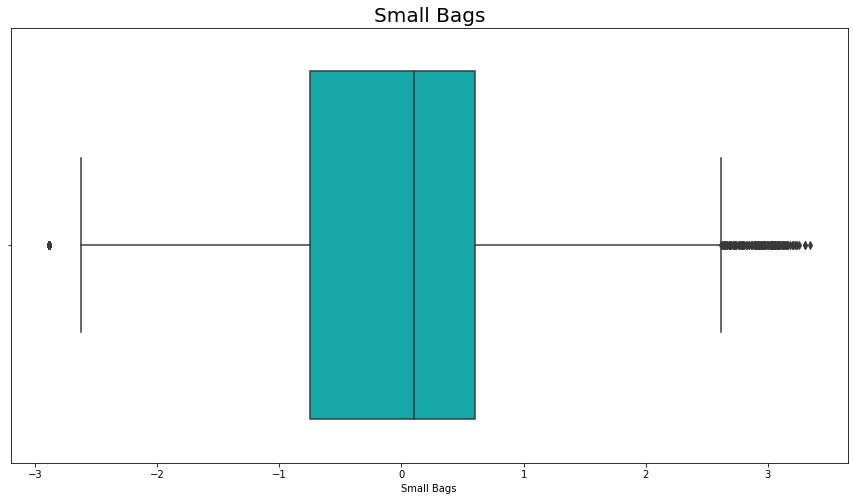

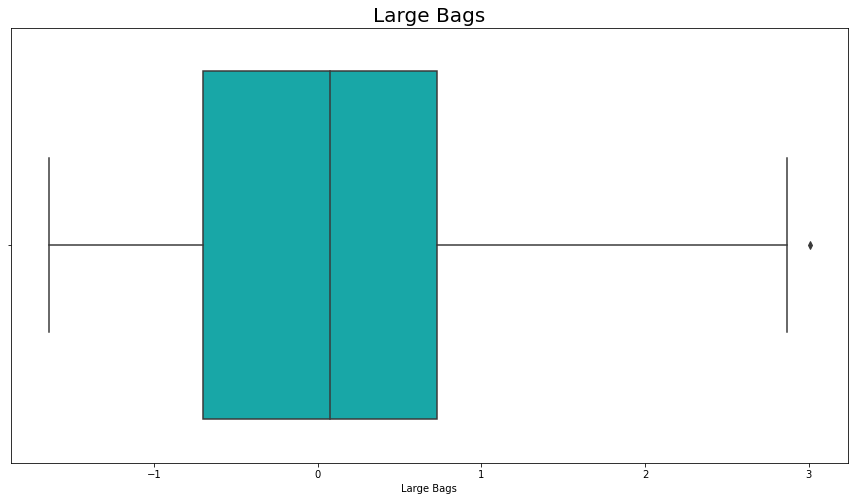

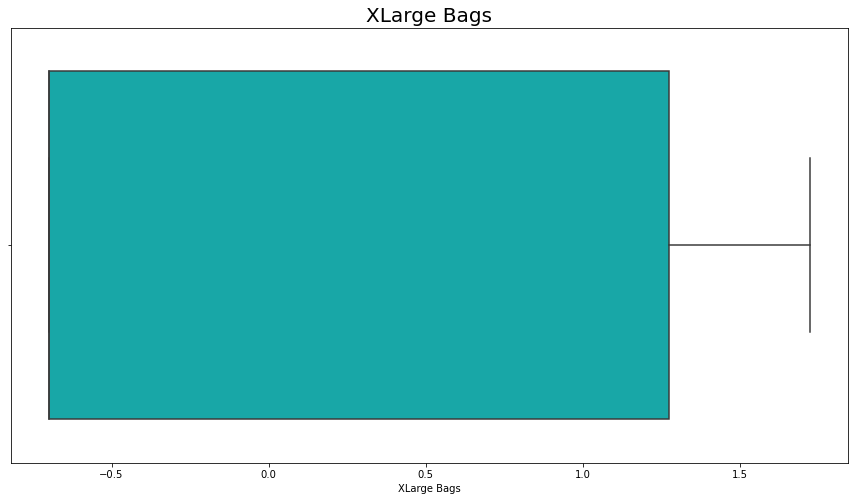

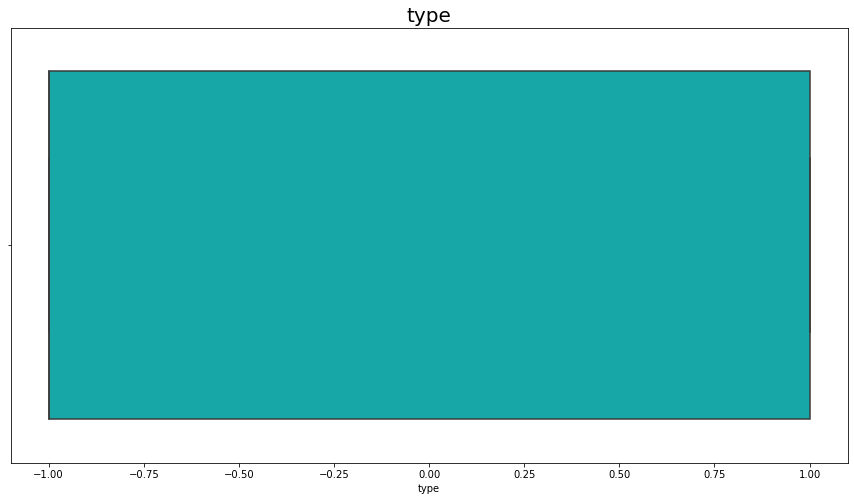

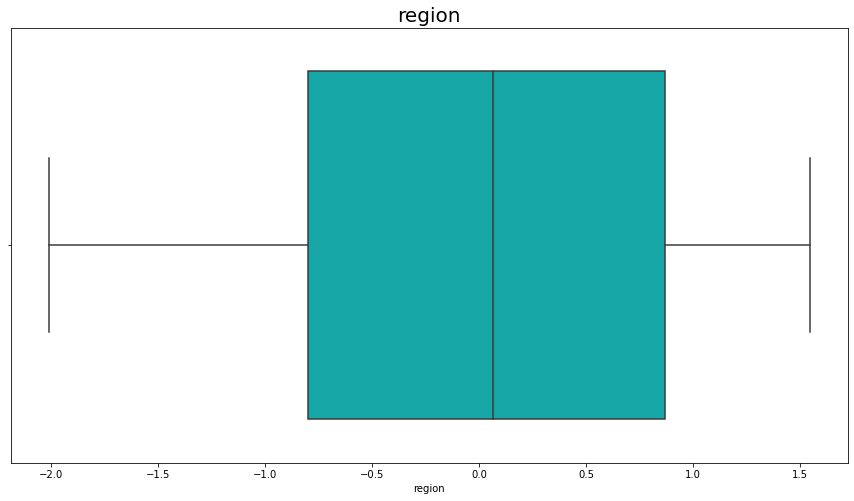

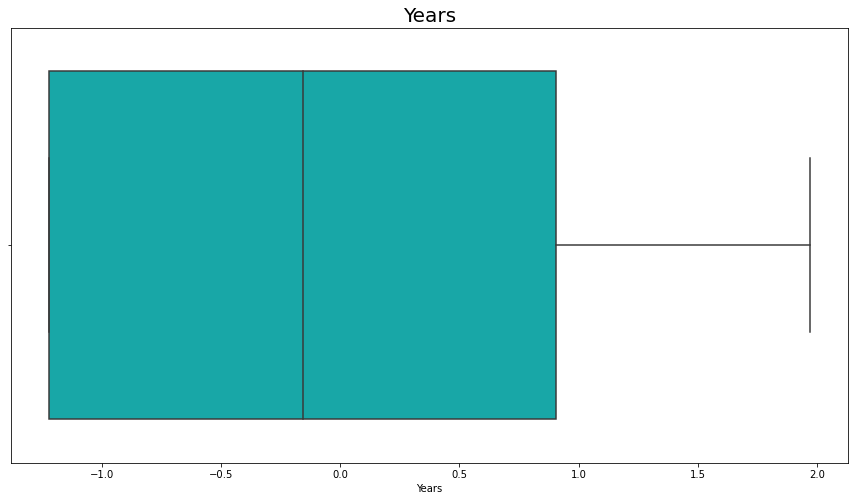

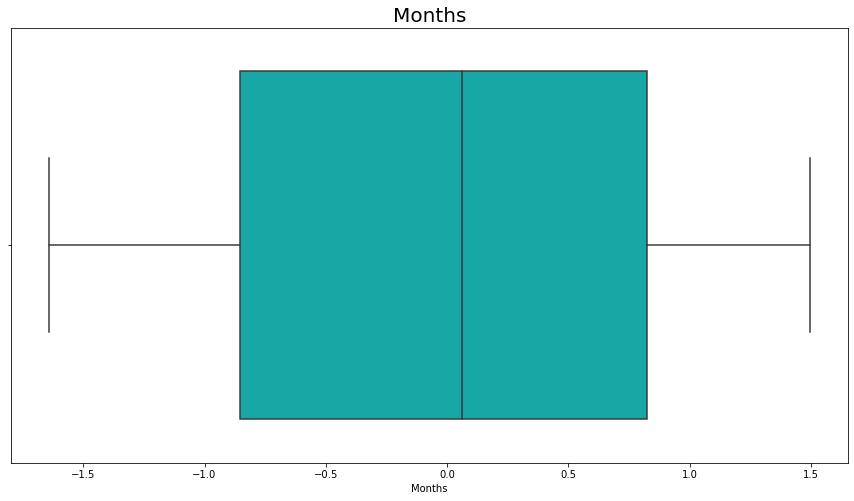

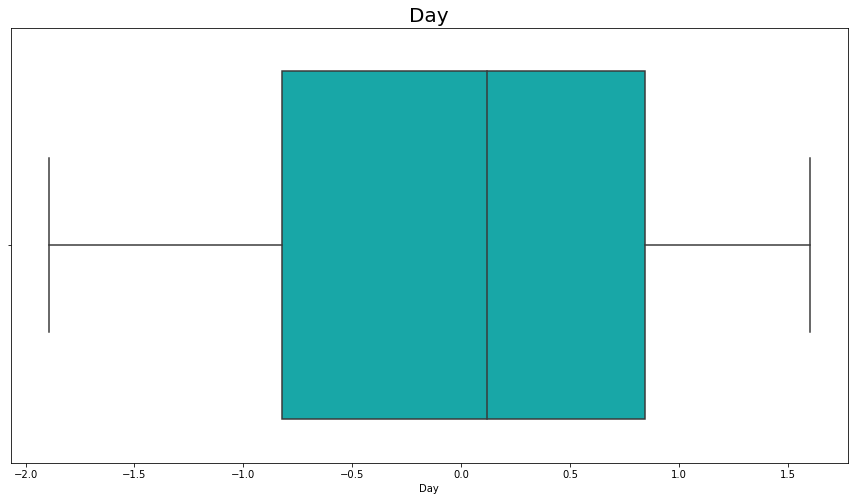

In [72]:
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.boxplot(x[i], color = 'c')
    plt.title(i, fontsize = 20)
    plt.show()

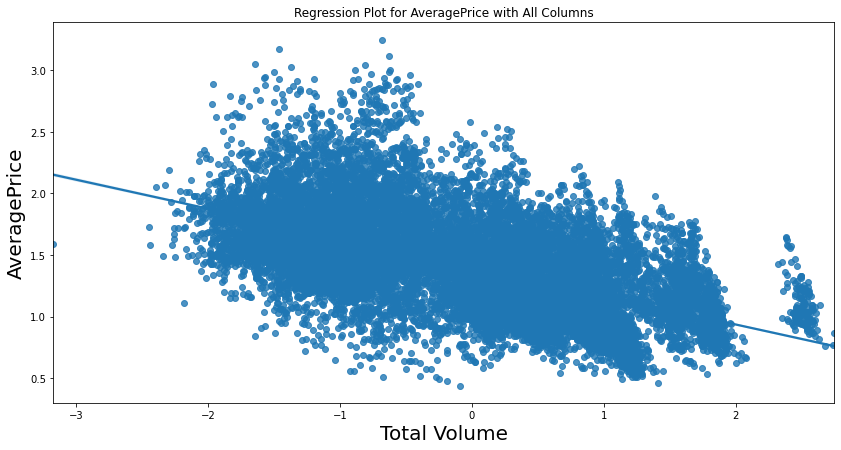

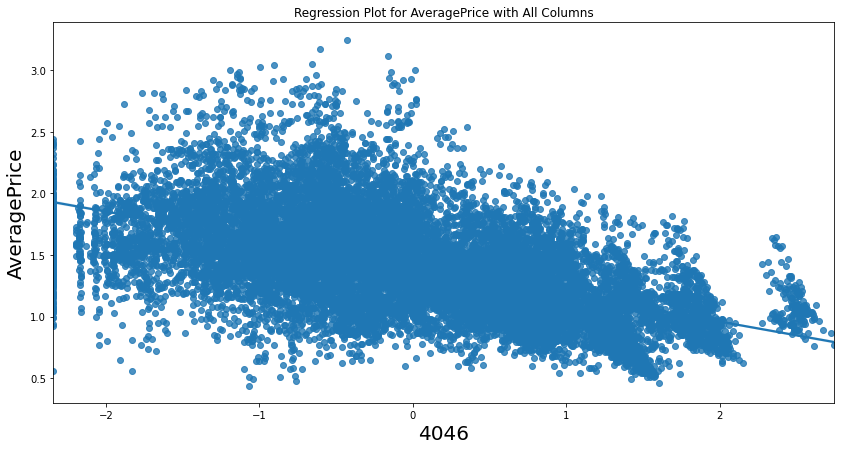

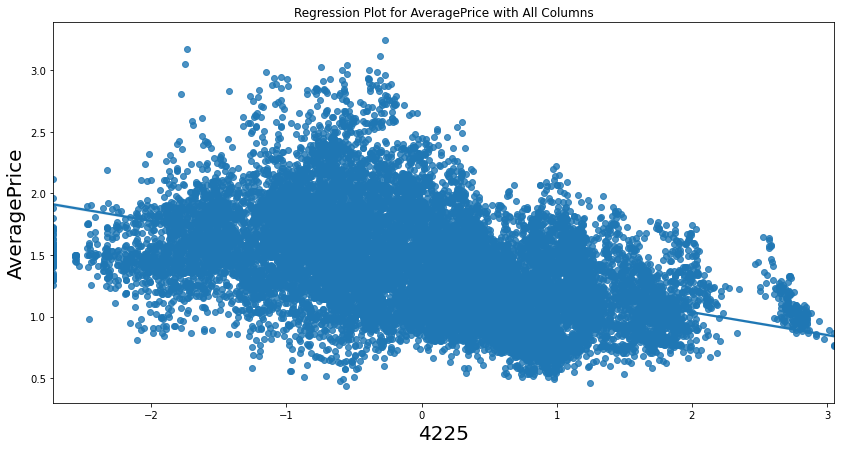

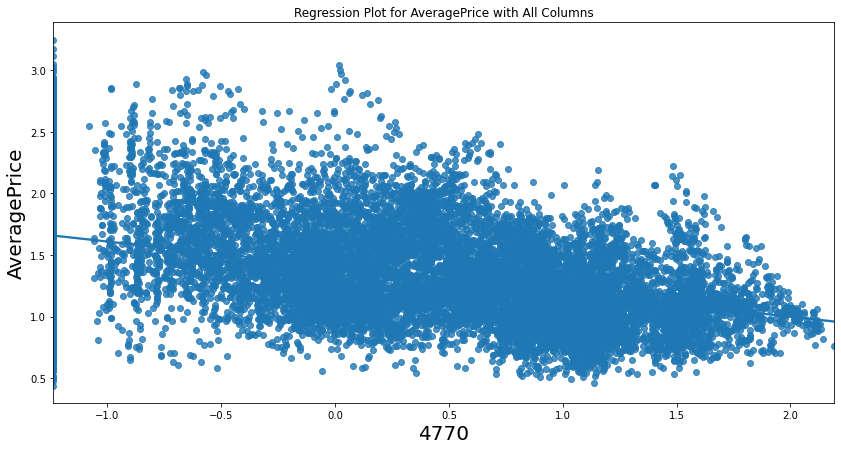

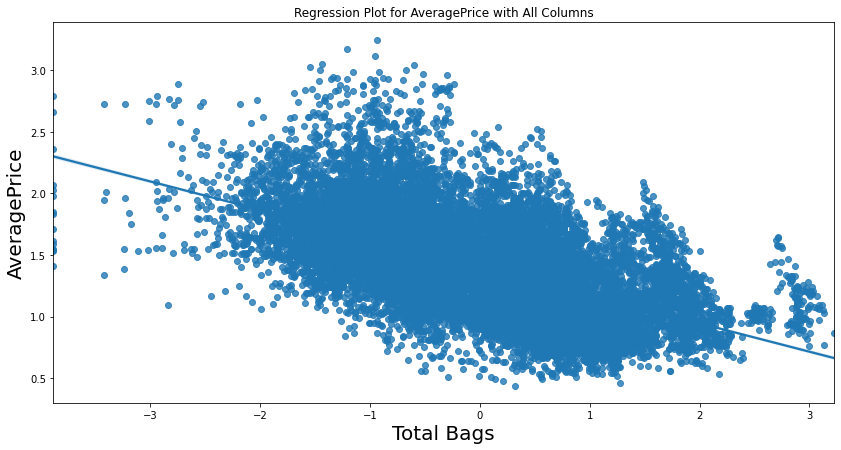

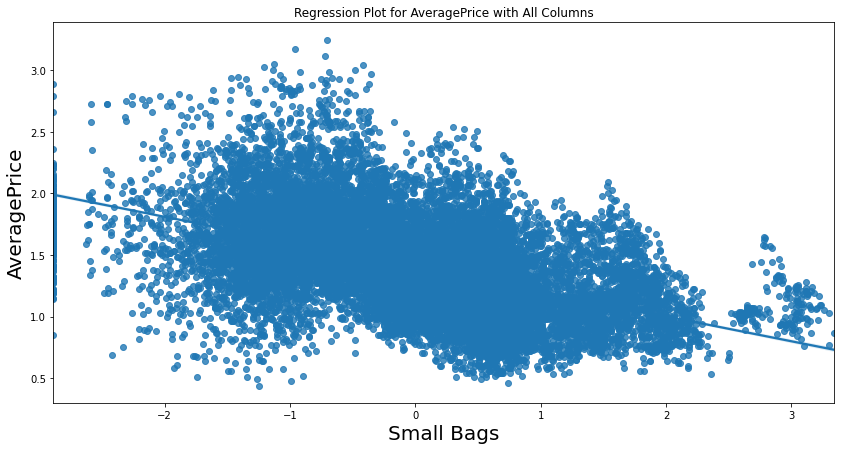

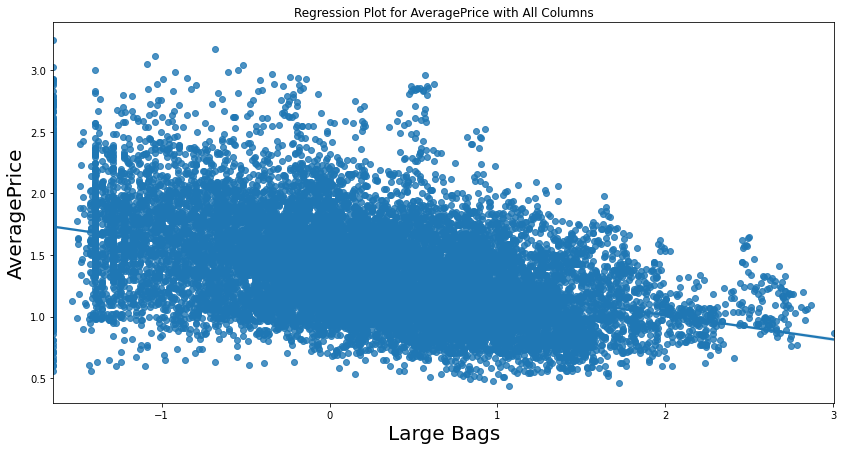

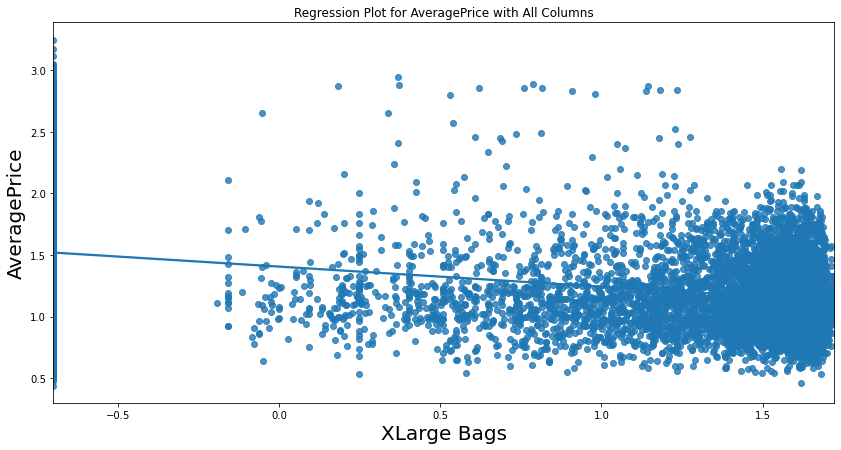

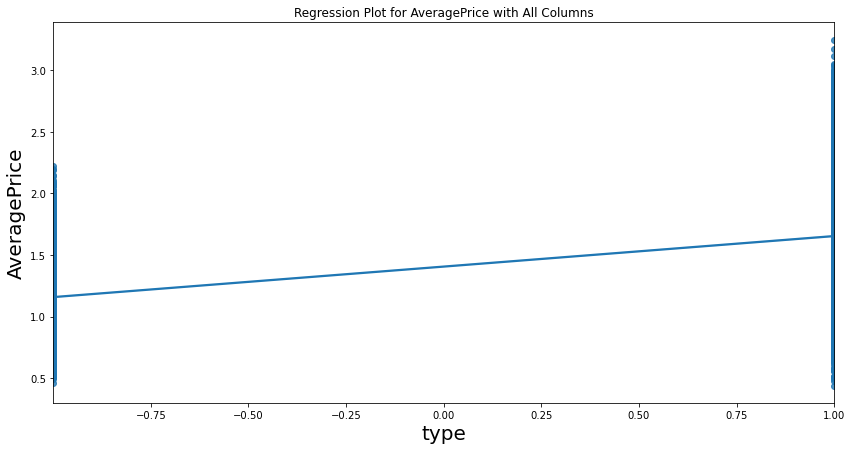

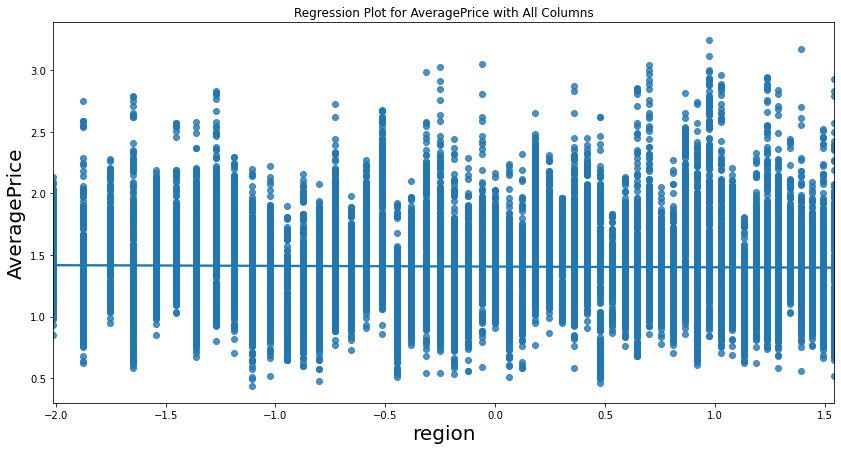

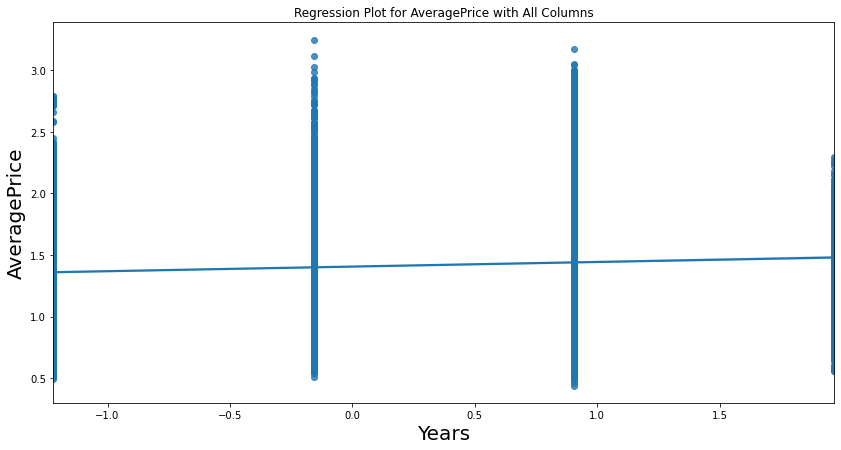

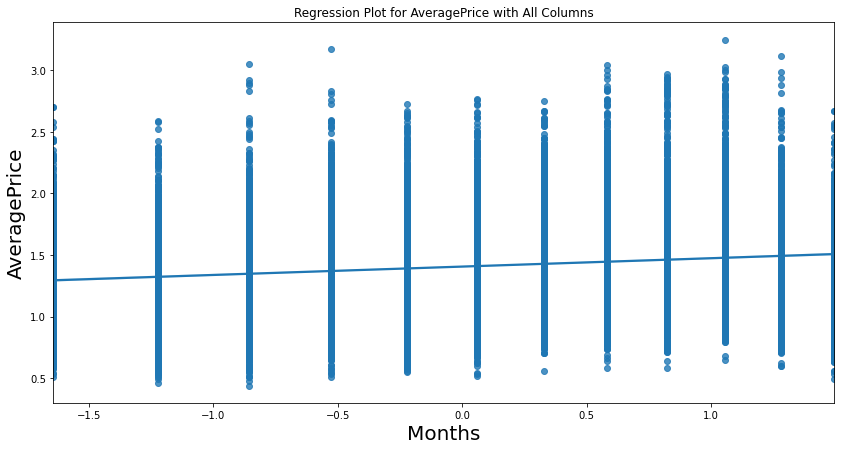

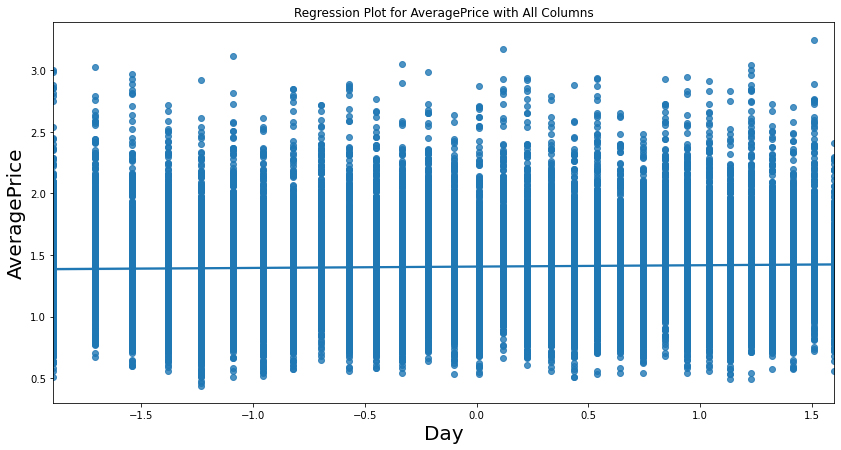

In [73]:
for i in x:
    plt.figure(figsize = (14,7))
    sns.regplot(x[i], y)
    plt.title('Regression Plot for AveragePrice with All Columns')
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('AveragePrice', fontsize = 20)
    plt.show()

We have sorted the whole lot of skewness from the columns which were highly skewed though power transform, now our data is quite sorted. also the regression plot's linear line got much data points near and on linear line. Box plot is showing some outliears in some of the columns we are going to remove them by IQR metrhod.

## Removing outliers with IQR method

In [75]:
# adding AveragePrice column back to Data Frame
x['AveragePrice'] = y

In [102]:
# setting the quantiles for the data set
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

In [83]:
# renaming the column 4225 from integers to string as integer cannot be put in numpy methods
x['PLU4225'] = x['4225']
x = x.drop(columns = ['4225'])

In [91]:
# renaming the columns which have gap in their column name. numpy method can not take column name having gap
x['TotalBags'] = x['Total Bags']
x['SmallBags'] = x['Small Bags']
x['LargeBags'] = x['Large Bags']
x = x.drop(columns = ['Total Bags', 'Small Bags', 'Large Bags'])

In [103]:
# removing higher side outliers from PLU4225
index = np.where(x['PLU4225'] > (q3.PLU4225 + (1.5 * iqr.PLU4225)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770  XLarge Bags      type  \
0          0     -0.086605 -0.658619 -0.247250    -0.699849 -0.999836   
1          1     -0.155746 -0.776870 -0.201041    -0.699849 -0.999836   
2          2      0.179327 -0.731947 -0.007072    -0.699849 -0.999836   
3          3      0.003876 -0.634200 -0.148322    -0.699849 -0.999836   
4          4     -0.187640 -0.685293 -0.137918    -0.699849 -0.999836   
...      ...           ...       ...       ...          ...       ...   
17896  18244     -0.674587 -0.467366 -1.238310    -0.699849  1.000164   
17897  18245     -0.767550 -0.619883 -1.238310    -0.699849  1.000164   
17898  18246     -0.771505 -0.619831  0.401546    -0.699849  1.000164   
17899  18247     -0.698077 -0.550282  0.401246    -0.699849  1.000164   
17900  18248     -0.663809 -0.367908  0.122919    -0.699849  1.000164   

         region     Years    Months       Day  AveragePrice   PLU4225  \
0     -2.011552 -1.221895  1.494347  1.229285          1.33  0.307313   
1     -2.011552 -1.221895  1.494347  0.541005          1.35  0.231647   
2     -2.011552 -1.221895  1.494347 -0.215570          0.93  0.579503   
3     -2.011552 -1.221895  1.494347 -1.091311          1.08  0.415100   
4     -2.011552 -1.221895  1.278438  1.416727          1.28  0.224806   
...         ...       ...       ...       ...           ...       ...   
17896  1.543838  1.968548 -1.220706 -1.382073          1.63 -0.919470   
17897  1.543838  1.968548 -1.642047  1.323455          1.71 -0.665372   
17898  1.543838  1.968548 -1.642047  0.642842          1.87 -0.772496   
17899  1.543838  1.968548 -1.642047 -0.101959          1.93 -0.710543   
17900  1.543838  1.968548 -1.642047 -0.954854          1.62 -0.785173   

       TotalBags  SmallBags  LargeBags  
0      -0.524004  -0.340627  -0.773351  
1      -0.485890  -0.306425  -0.763435  
2      -0.552018  -0.366303  -0.750820  
3      -0.695449  -0.496853  -0.691865  
4      -0.669157  -0.477201  -0.600975  
...          ...        ...        ...  
17896  -0.334466  -0.178839  -0.410859  
17897  -0.496897  -0.325977  -0.481465  
17898  -0.490952  -0.308728  -0.943486  
17899  -0.424252  -0.248932  -0.908510  
17900  -0.384961  -0.212590  -1.042250  

[17901 rows x 15 columns]

In [104]:
# removing higher side outliers from TotalBags
index = np.where(x['TotalBags'] > (q3.TotalBags + (1.5 * iqr.TotalBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770  XLarge Bags      type  \
0          0     -0.086605 -0.658619 -0.247250    -0.699849 -0.999836   
1          1     -0.155746 -0.776870 -0.201041    -0.699849 -0.999836   
2          2      0.179327 -0.731947 -0.007072    -0.699849 -0.999836   
3          3      0.003876 -0.634200 -0.148322    -0.699849 -0.999836   
4          4     -0.187640 -0.685293 -0.137918    -0.699849 -0.999836   
...      ...           ...       ...       ...          ...       ...   
17896  18244     -0.674587 -0.467366 -1.238310    -0.699849  1.000164   
17897  18245     -0.767550 -0.619883 -1.238310    -0.699849  1.000164   
17898  18246     -0.771505 -0.619831  0.401546    -0.699849  1.000164   
17899  18247     -0.698077 -0.550282  0.401246    -0.699849  1.000164   
17900  18248     -0.663809 -0.367908  0.122919    -0.699849  1.000164   

         region     Years    Months       Day  AveragePrice   PLU4225  \
0     -2.011552 -1.221895  1.494347  1.229285          1.33  0.307313   
1     -2.011552 -1.221895  1.494347  0.541005          1.35  0.231647   
2     -2.011552 -1.221895  1.494347 -0.215570          0.93  0.579503   
3     -2.011552 -1.221895  1.494347 -1.091311          1.08  0.415100   
4     -2.011552 -1.221895  1.278438  1.416727          1.28  0.224806   
...         ...       ...       ...       ...           ...       ...   
17896  1.543838  1.968548 -1.220706 -1.382073          1.63 -0.919470   
17897  1.543838  1.968548 -1.642047  1.323455          1.71 -0.665372   
17898  1.543838  1.968548 -1.642047  0.642842          1.87 -0.772496   
17899  1.543838  1.968548 -1.642047 -0.101959          1.93 -0.710543   
17900  1.543838  1.968548 -1.642047 -0.954854          1.62 -0.785173   

       TotalBags  SmallBags  LargeBags  
0      -0.524004  -0.340627  -0.773351  
1      -0.485890  -0.306425  -0.763435  
2      -0.552018  -0.366303  -0.750820  
3      -0.695449  -0.496853  -0.691865  
4      -0.669157  -0.477201  -0.600975  
...          ...        ...        ...  
17896  -0.334466  -0.178839  -0.410859  
17897  -0.496897  -0.325977  -0.481465  
17898  -0.490952  -0.308728  -0.943486  
17899  -0.424252  -0.248932  -0.908510  
17900  -0.384961  -0.212590  -1.042250  

[17901 rows x 15 columns]

In [105]:
# removing lower side outliers from PLU4225
index = np.where(x['TotalBags'] < (q1.TotalBags - (1.5 * iqr.TotalBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770  XLarge Bags      type  \
0          0     -0.086605 -0.658619 -0.247250    -0.699849 -0.999836   
1          1     -0.155746 -0.776870 -0.201041    -0.699849 -0.999836   
2          2      0.179327 -0.731947 -0.007072    -0.699849 -0.999836   
3          3      0.003876 -0.634200 -0.148322    -0.699849 -0.999836   
4          4     -0.187640 -0.685293 -0.137918    -0.699849 -0.999836   
...      ...           ...       ...       ...          ...       ...   
17892  18244     -0.674587 -0.467366 -1.238310    -0.699849  1.000164   
17893  18245     -0.767550 -0.619883 -1.238310    -0.699849  1.000164   
17894  18246     -0.771505 -0.619831  0.401546    -0.699849  1.000164   
17895  18247     -0.698077 -0.550282  0.401246    -0.699849  1.000164   
17896  18248     -0.663809 -0.367908  0.122919    -0.699849  1.000164   

         region     Years    Months       Day  AveragePrice   PLU4225  \
0     -2.011552 -1.221895  1.494347  1.229285          1.33  0.307313   
1     -2.011552 -1.221895  1.494347  0.541005          1.35  0.231647   
2     -2.011552 -1.221895  1.494347 -0.215570          0.93  0.579503   
3     -2.011552 -1.221895  1.494347 -1.091311          1.08  0.415100   
4     -2.011552 -1.221895  1.278438  1.416727          1.28  0.224806   
...         ...       ...       ...       ...           ...       ...   
17892  1.543838  1.968548 -1.220706 -1.382073          1.63 -0.919470   
17893  1.543838  1.968548 -1.642047  1.323455          1.71 -0.665372   
17894  1.543838  1.968548 -1.642047  0.642842          1.87 -0.772496   
17895  1.543838  1.968548 -1.642047 -0.101959          1.93 -0.710543   
17896  1.543838  1.968548 -1.642047 -0.954854          1.62 -0.785173   

       TotalBags  SmallBags  LargeBags  
0      -0.524004  -0.340627  -0.773351  
1      -0.485890  -0.306425  -0.763435  
2      -0.552018  -0.366303  -0.750820  
3      -0.695449  -0.496853  -0.691865  
4      -0.669157  -0.477201  -0.600975  
...          ...        ...        ...  
17892  -0.334466  -0.178839  -0.410859  
17893  -0.496897  -0.325977  -0.481465  
17894  -0.490952  -0.308728  -0.943486  
17895  -0.424252  -0.248932  -0.908510  
17896  -0.384961  -0.212590  -1.042250  

[17897 rows x 15 columns]

In [106]:
# removing higher side outliers from SmallBags
index = np.where(x['SmallBags'] > (q3.SmallBags + (1.5 * iqr.SmallBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770  XLarge Bags      type  \
0          0     -0.086605 -0.658619 -0.247250    -0.699849 -0.999836   
1          1     -0.155746 -0.776870 -0.201041    -0.699849 -0.999836   
2          2      0.179327 -0.731947 -0.007072    -0.699849 -0.999836   
3          3      0.003876 -0.634200 -0.148322    -0.699849 -0.999836   
4          4     -0.187640 -0.685293 -0.137918    -0.699849 -0.999836   
...      ...           ...       ...       ...          ...       ...   
17886  18244     -0.674587 -0.467366 -1.238310    -0.699849  1.000164   
17887  18245     -0.767550 -0.619883 -1.238310    -0.699849  1.000164   
17888  18246     -0.771505 -0.619831  0.401546    -0.699849  1.000164   
17889  18247     -0.698077 -0.550282  0.401246    -0.699849  1.000164   
17890  18248     -0.663809 -0.367908  0.122919    -0.699849  1.000164   

         region     Years    Months       Day  AveragePrice   PLU4225  \
0     -2.011552 -1.221895  1.494347  1.229285          1.33  0.307313   
1     -2.011552 -1.221895  1.494347  0.541005          1.35  0.231647   
2     -2.011552 -1.221895  1.494347 -0.215570          0.93  0.579503   
3     -2.011552 -1.221895  1.494347 -1.091311          1.08  0.415100   
4     -2.011552 -1.221895  1.278438  1.416727          1.28  0.224806   
...         ...       ...       ...       ...           ...       ...   
17886  1.543838  1.968548 -1.220706 -1.382073          1.63 -0.919470   
17887  1.543838  1.968548 -1.642047  1.323455          1.71 -0.665372   
17888  1.543838  1.968548 -1.642047  0.642842          1.87 -0.772496   
17889  1.543838  1.968548 -1.642047 -0.101959          1.93 -0.710543   
17890  1.543838  1.968548 -1.642047 -0.954854          1.62 -0.785173   

       TotalBags  SmallBags  LargeBags  
0      -0.524004  -0.340627  -0.773351  
1      -0.485890  -0.306425  -0.763435  
2      -0.552018  -0.366303  -0.750820  
3      -0.695449  -0.496853  -0.691865  
4      -0.669157  -0.477201  -0.600975  
...          ...        ...        ...  
17886  -0.334466  -0.178839  -0.410859  
17887  -0.496897  -0.325977  -0.481465  
17888  -0.490952  -0.308728  -0.943486  
17889  -0.424252  -0.248932  -0.908510  
17890  -0.384961  -0.212590  -1.042250  

[17891 rows x 15 columns]

In [107]:
# removing lower side outliers from smallBags
index = np.where(x['SmallBags'] < (q1.SmallBags - (1.5 * iqr.SmallBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770  XLarge Bags      type  \
0          0     -0.086605 -0.658619 -0.247250    -0.699849 -0.999836   
1          1     -0.155746 -0.776870 -0.201041    -0.699849 -0.999836   
2          2      0.179327 -0.731947 -0.007072    -0.699849 -0.999836   
3          3      0.003876 -0.634200 -0.148322    -0.699849 -0.999836   
4          4     -0.187640 -0.685293 -0.137918    -0.699849 -0.999836   
...      ...           ...       ...       ...          ...       ...   
17886  18244     -0.674587 -0.467366 -1.238310    -0.699849  1.000164   
17887  18245     -0.767550 -0.619883 -1.238310    -0.699849  1.000164   
17888  18246     -0.771505 -0.619831  0.401546    -0.699849  1.000164   
17889  18247     -0.698077 -0.550282  0.401246    -0.699849  1.000164   
17890  18248     -0.663809 -0.367908  0.122919    -0.699849  1.000164   

         region     Years    Months       Day  AveragePrice   PLU4225  \
0     -2.011552 -1.221895  1.494347  1.229285          1.33  0.307313   
1     -2.011552 -1.221895  1.494347  0.541005          1.35  0.231647   
2     -2.011552 -1.221895  1.494347 -0.215570          0.93  0.579503   
3     -2.011552 -1.221895  1.494347 -1.091311          1.08  0.415100   
4     -2.011552 -1.221895  1.278438  1.416727          1.28  0.224806   
...         ...       ...       ...       ...           ...       ...   
17886  1.543838  1.968548 -1.220706 -1.382073          1.63 -0.919470   
17887  1.543838  1.968548 -1.642047  1.323455          1.71 -0.665372   
17888  1.543838  1.968548 -1.642047  0.642842          1.87 -0.772496   
17889  1.543838  1.968548 -1.642047 -0.101959          1.93 -0.710543   
17890  1.543838  1.968548 -1.642047 -0.954854          1.62 -0.785173   

       TotalBags  SmallBags  LargeBags  
0      -0.524004  -0.340627  -0.773351  
1      -0.485890  -0.306425  -0.763435  
2      -0.552018  -0.366303  -0.750820  
3      -0.695449  -0.496853  -0.691865  
4      -0.669157  -0.477201  -0.600975  
...          ...        ...        ...  
17886  -0.334466  -0.178839  -0.410859  
17887  -0.496897  -0.325977  -0.481465  
17888  -0.490952  -0.308728  -0.943486  
17889  -0.424252  -0.248932  -0.908510  
17890  -0.384961  -0.212590  -1.042250  

[17891 rows x 15 columns]

In [108]:
# removing higher side outliers from LargeBags
index = np.where(x['LargeBags'] > (q3.LargeBags + (1.5 * iqr.LargeBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770  XLarge Bags      type  \
0          0     -0.086605 -0.658619 -0.247250    -0.699849 -0.999836   
1          1     -0.155746 -0.776870 -0.201041    -0.699849 -0.999836   
2          2      0.179327 -0.731947 -0.007072    -0.699849 -0.999836   
3          3      0.003876 -0.634200 -0.148322    -0.699849 -0.999836   
4          4     -0.187640 -0.685293 -0.137918    -0.699849 -0.999836   
...      ...           ...       ...       ...          ...       ...   
17886  18244     -0.674587 -0.467366 -1.238310    -0.699849  1.000164   
17887  18245     -0.767550 -0.619883 -1.238310    -0.699849  1.000164   
17888  18246     -0.771505 -0.619831  0.401546    -0.699849  1.000164   
17889  18247     -0.698077 -0.550282  0.401246    -0.699849  1.000164   
17890  18248     -0.663809 -0.367908  0.122919    -0.699849  1.000164   

         region     Years    Months       Day  AveragePrice   PLU4225  \
0     -2.011552 -1.221895  1.494347  1.229285          1.33  0.307313   
1     -2.011552 -1.221895  1.494347  0.541005          1.35  0.231647   
2     -2.011552 -1.221895  1.494347 -0.215570          0.93  0.579503   
3     -2.011552 -1.221895  1.494347 -1.091311          1.08  0.415100   
4     -2.011552 -1.221895  1.278438  1.416727          1.28  0.224806   
...         ...       ...       ...       ...           ...       ...   
17886  1.543838  1.968548 -1.220706 -1.382073          1.63 -0.919470   
17887  1.543838  1.968548 -1.642047  1.323455          1.71 -0.665372   
17888  1.543838  1.968548 -1.642047  0.642842          1.87 -0.772496   
17889  1.543838  1.968548 -1.642047 -0.101959          1.93 -0.710543   
17890  1.543838  1.968548 -1.642047 -0.954854          1.62 -0.785173   

       TotalBags  SmallBags  LargeBags  
0      -0.524004  -0.340627  -0.773351  
1      -0.485890  -0.306425  -0.763435  
2      -0.552018  -0.366303  -0.750820  
3      -0.695449  -0.496853  -0.691865  
4      -0.669157  -0.477201  -0.600975  
...          ...        ...        ...  
17886  -0.334466  -0.178839  -0.410859  
17887  -0.496897  -0.325977  -0.481465  
17888  -0.490952  -0.308728  -0.943486  
17889  -0.424252  -0.248932  -0.908510  
17890  -0.384961  -0.212590  -1.042250  

[17891 rows x 15 columns]

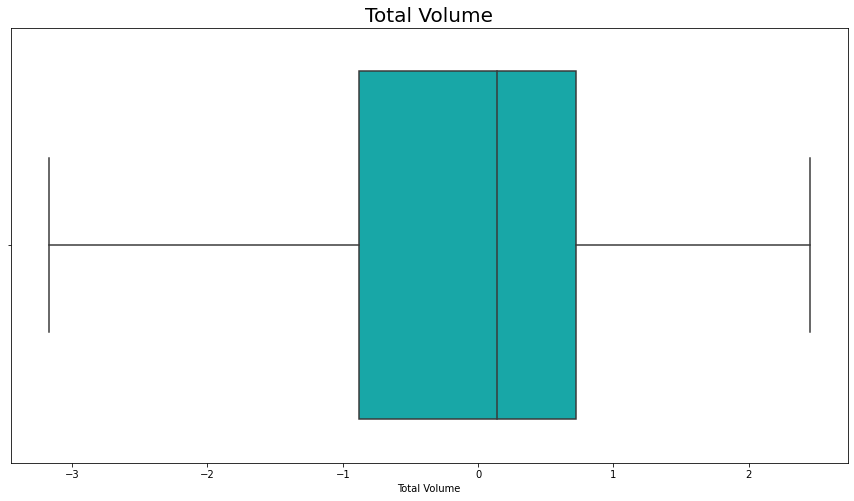

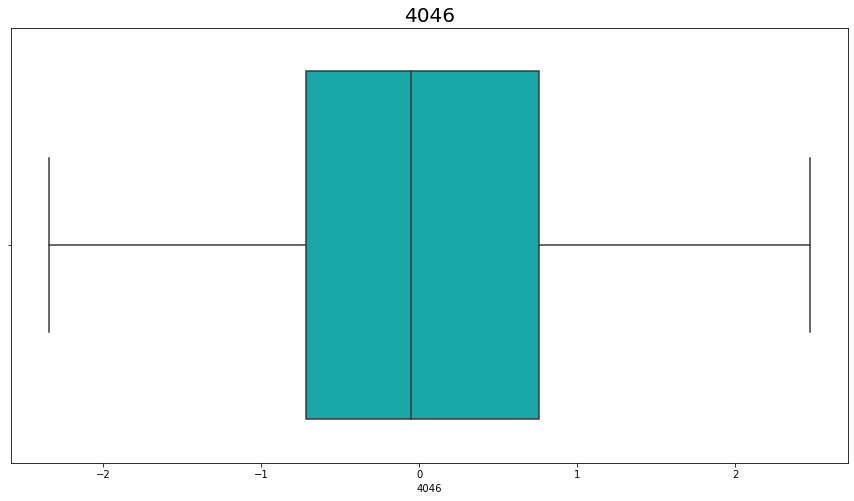

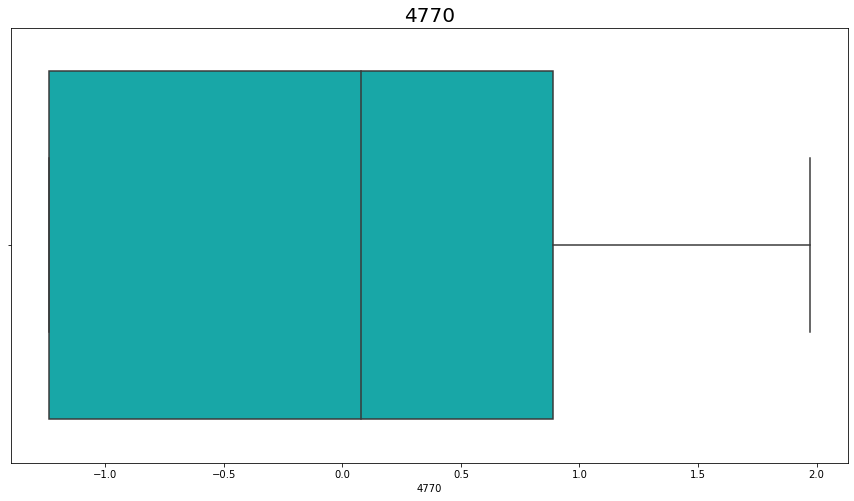

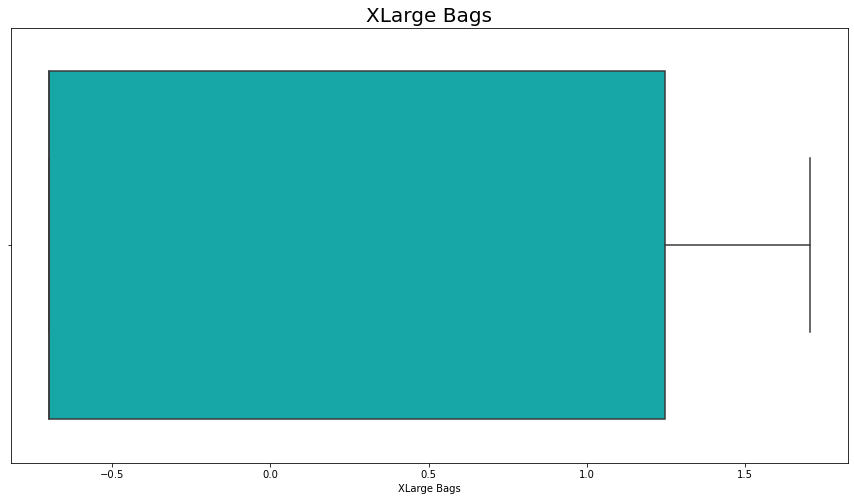

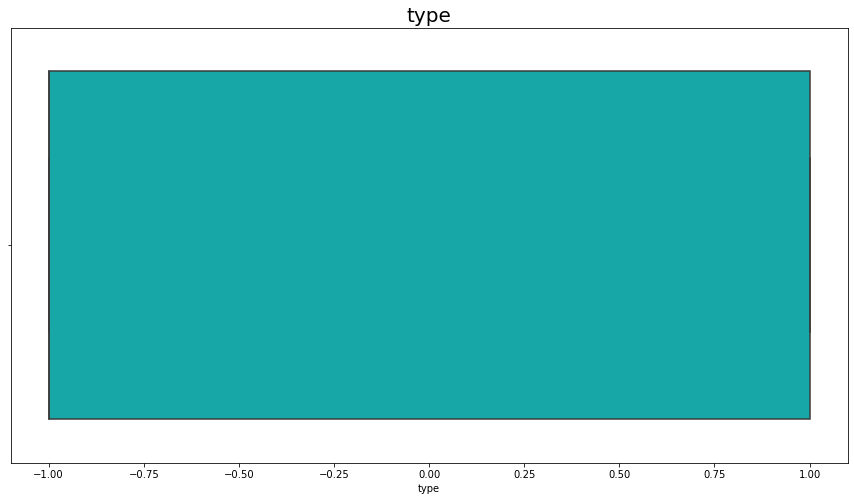

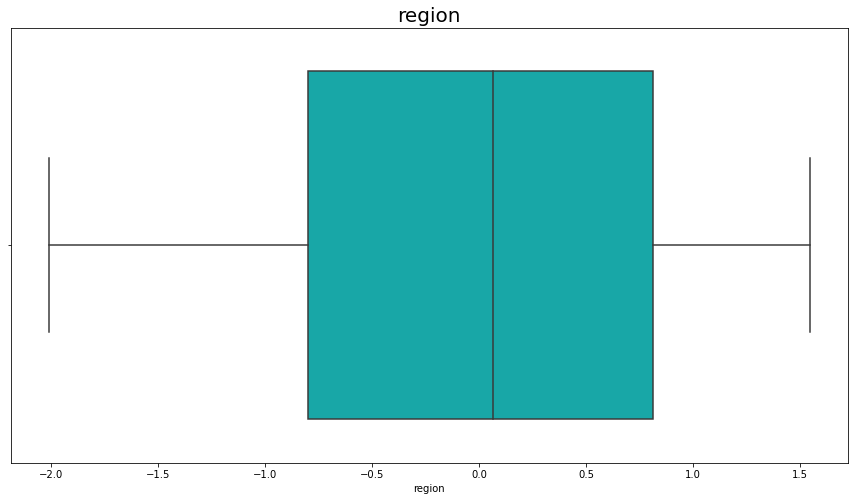

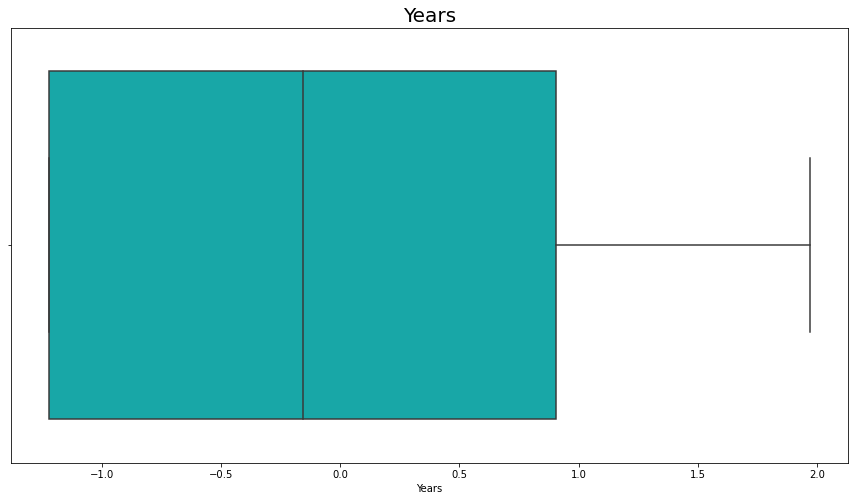

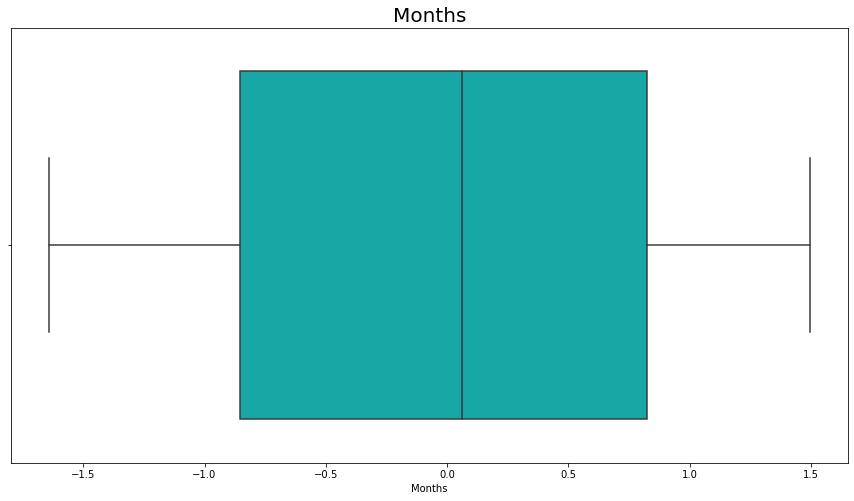

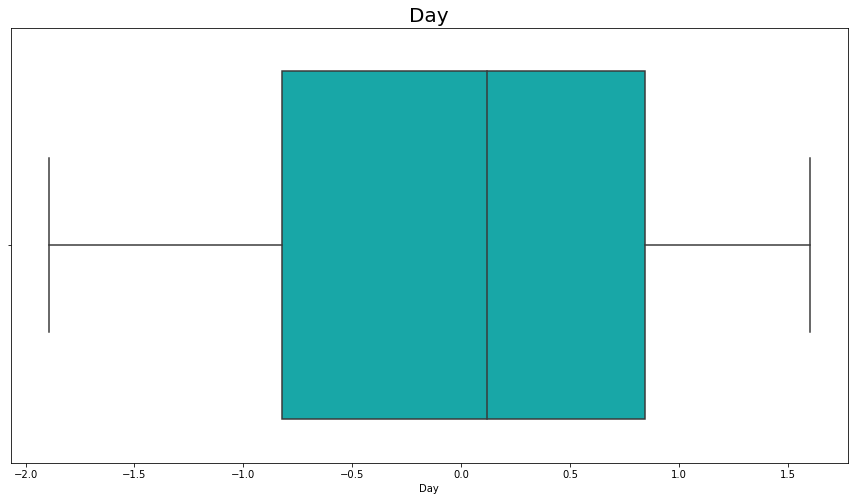

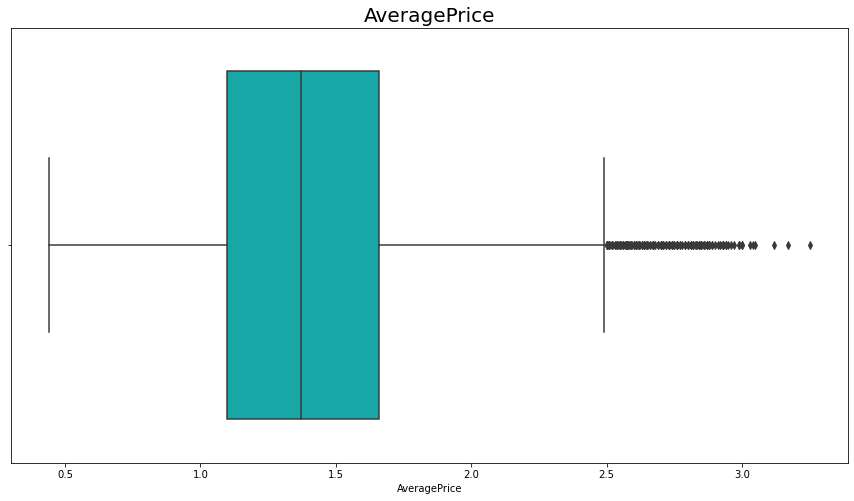

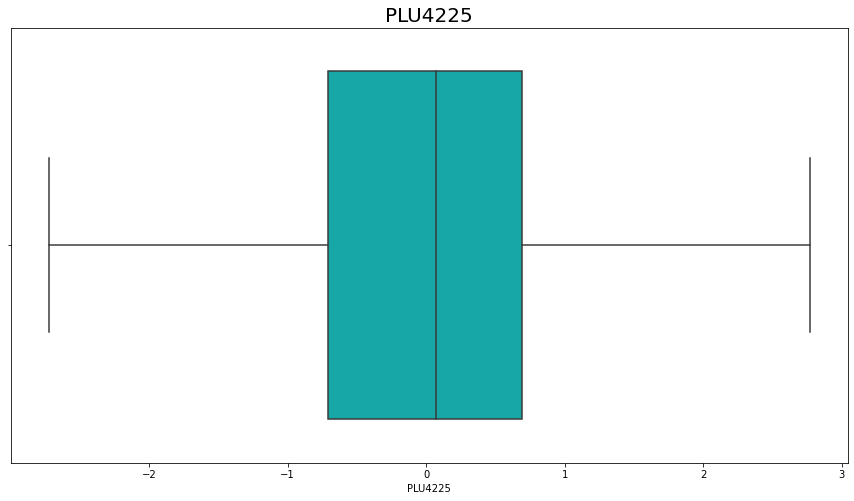

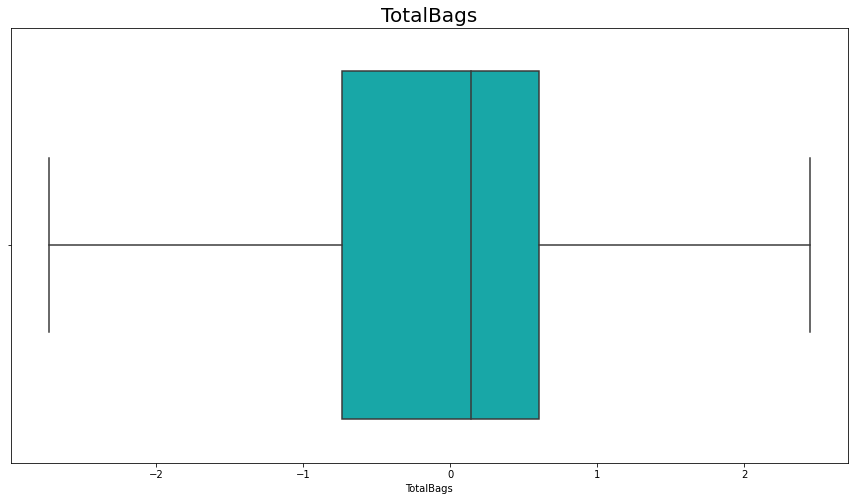

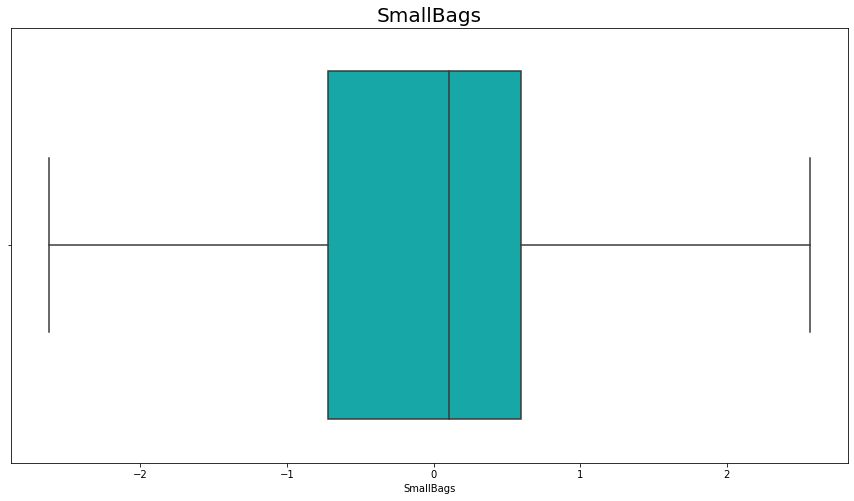

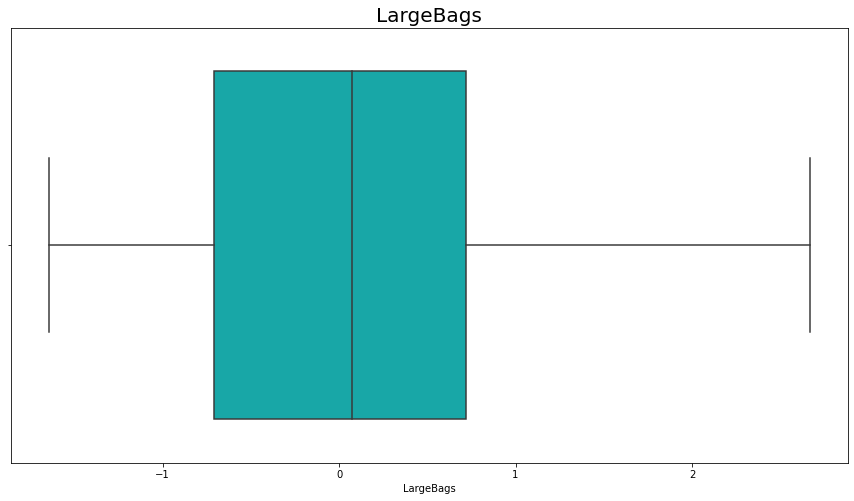

In [109]:
# for loop of boxplot to check outliers again
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.boxplot(x[i], color = 'c')
    plt.title(i, fontsize = 20)
    plt.show()

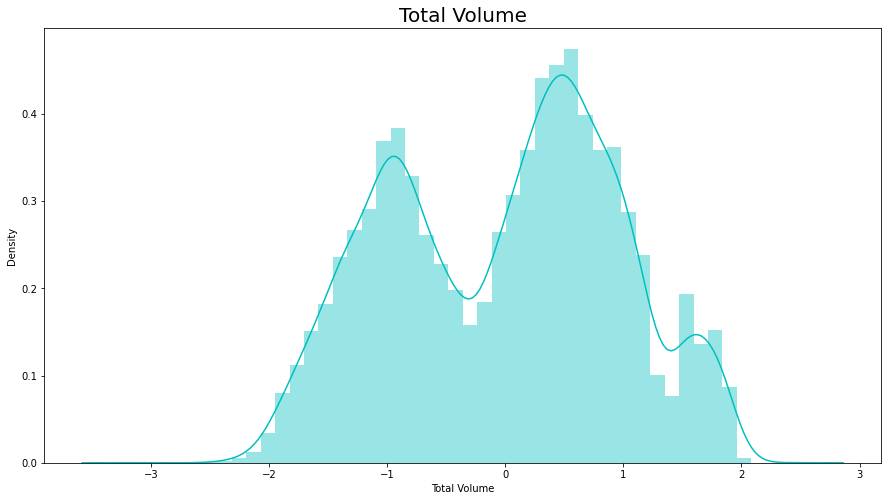

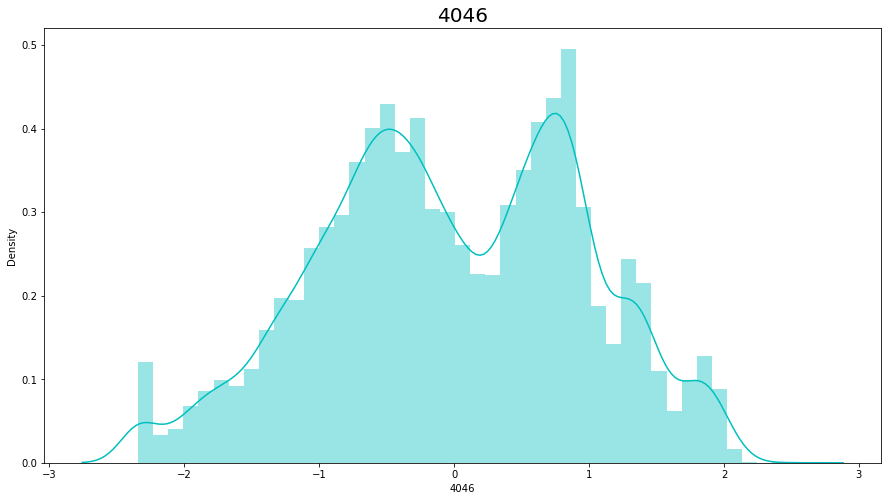

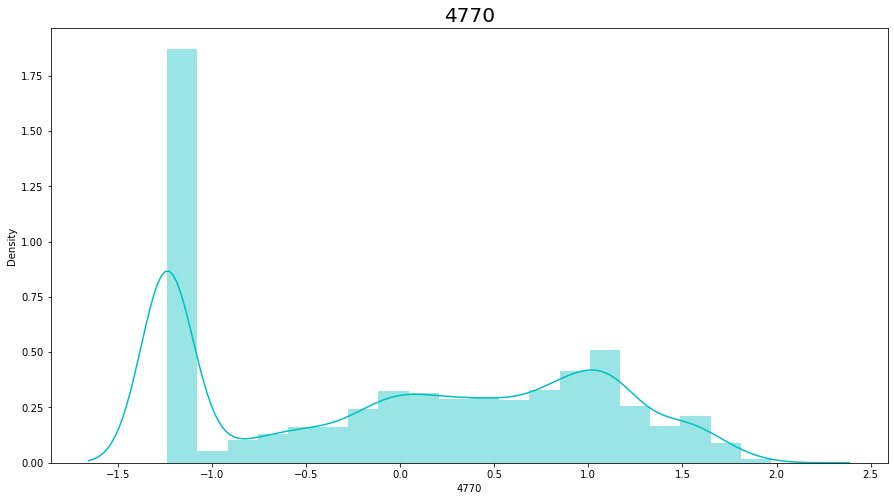

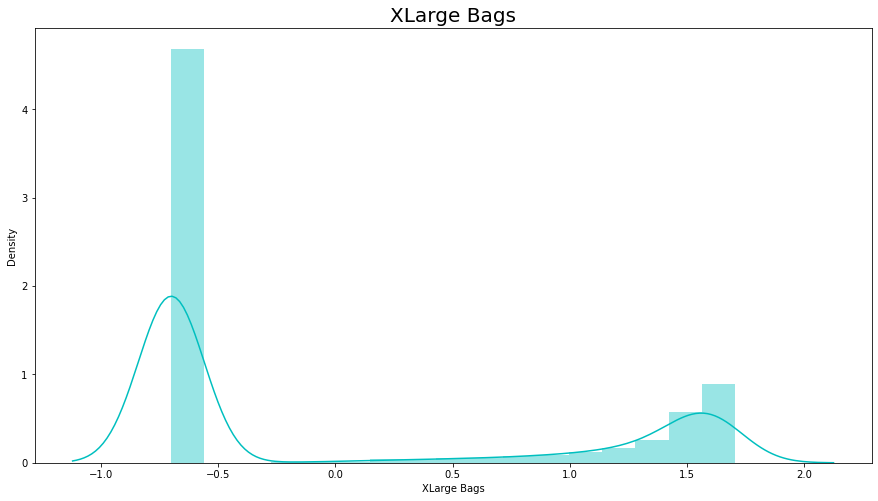

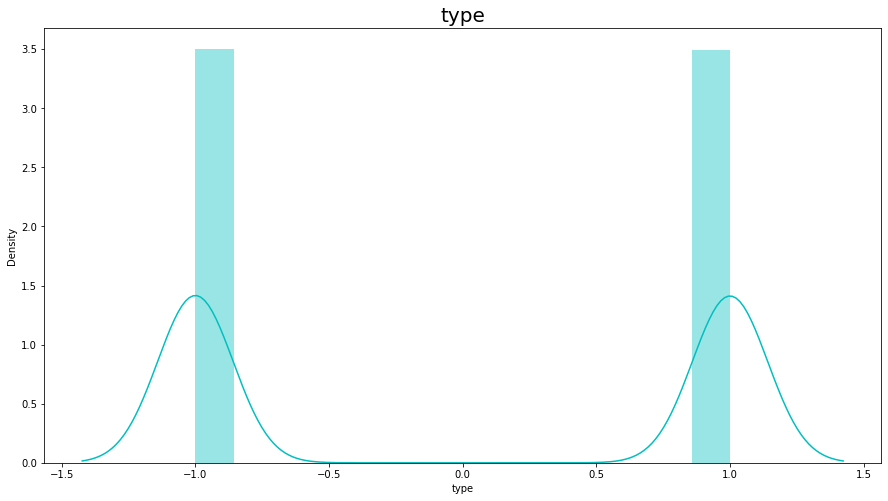

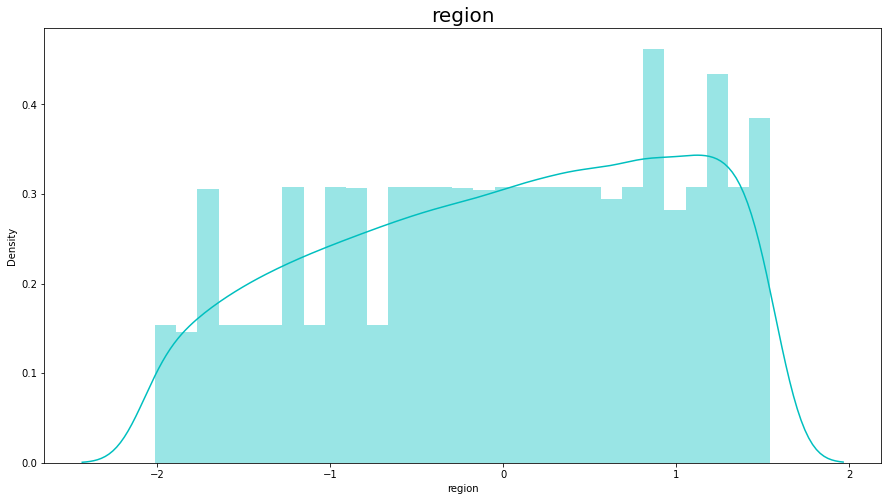

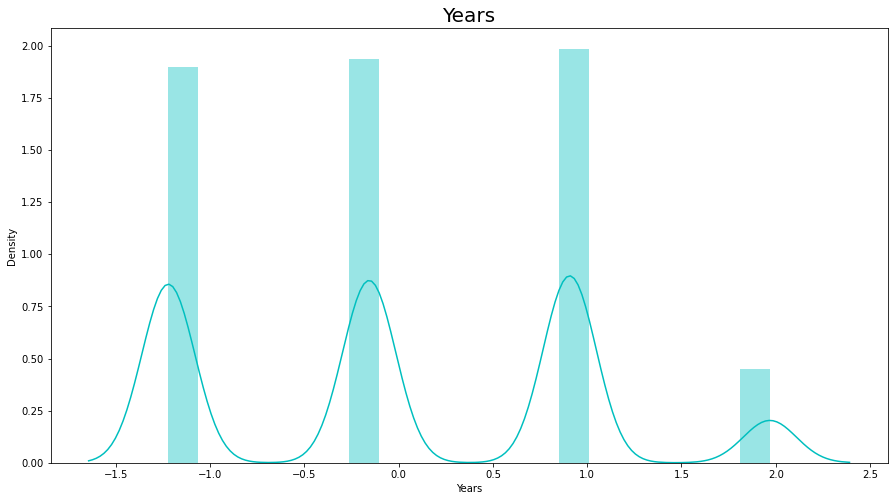

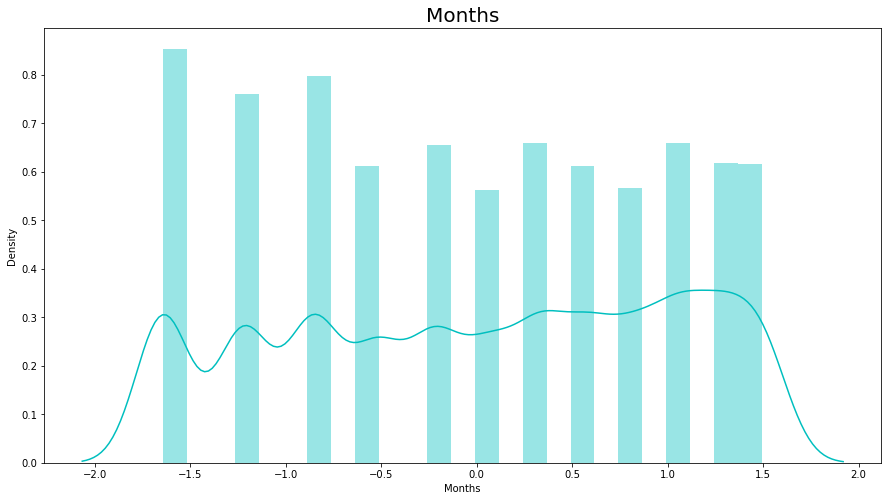

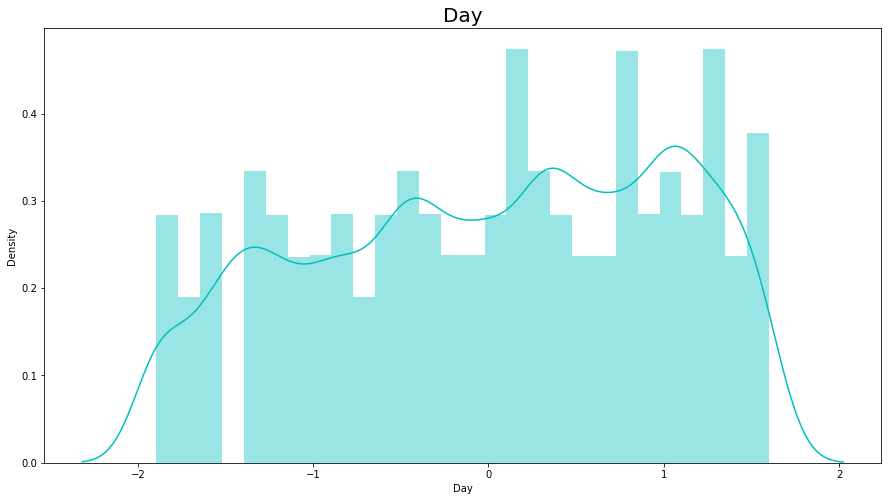

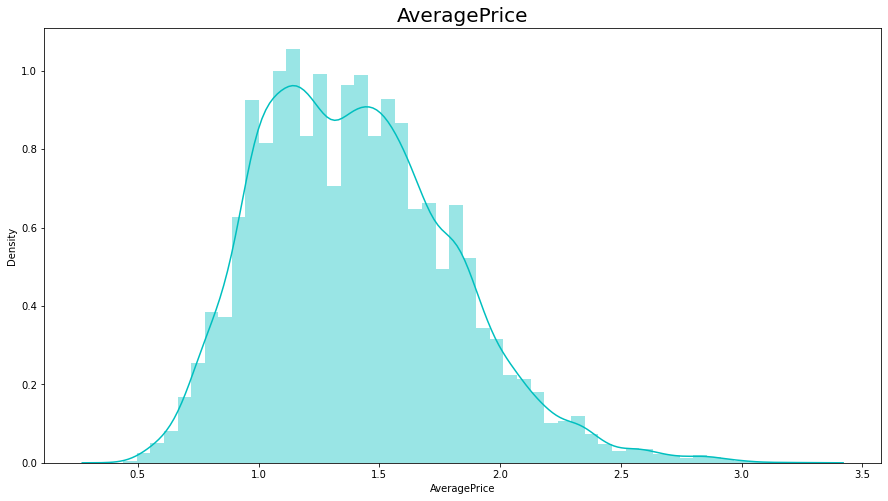

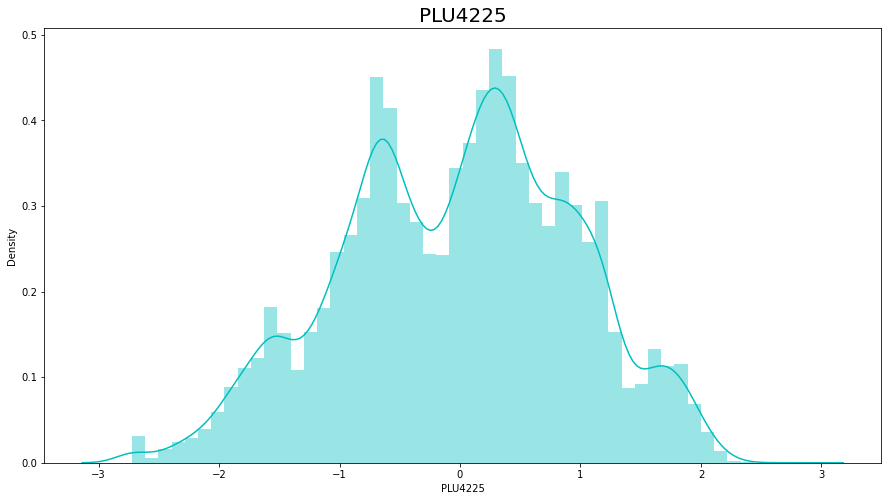

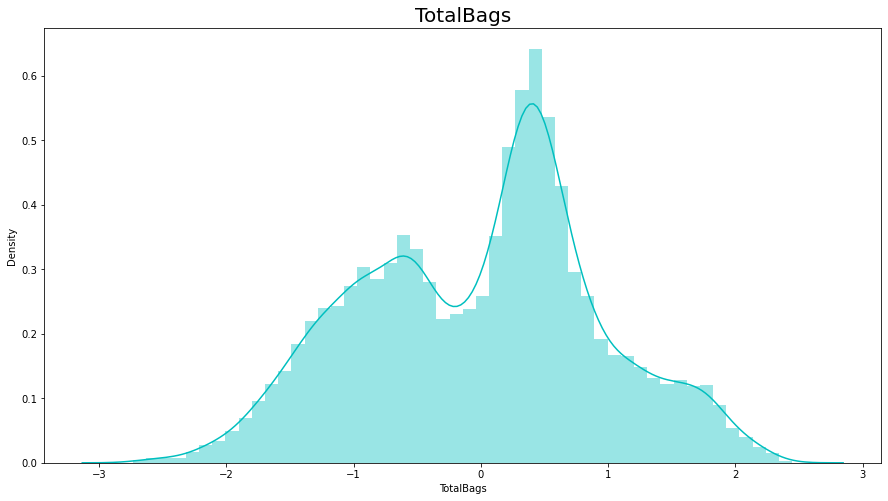

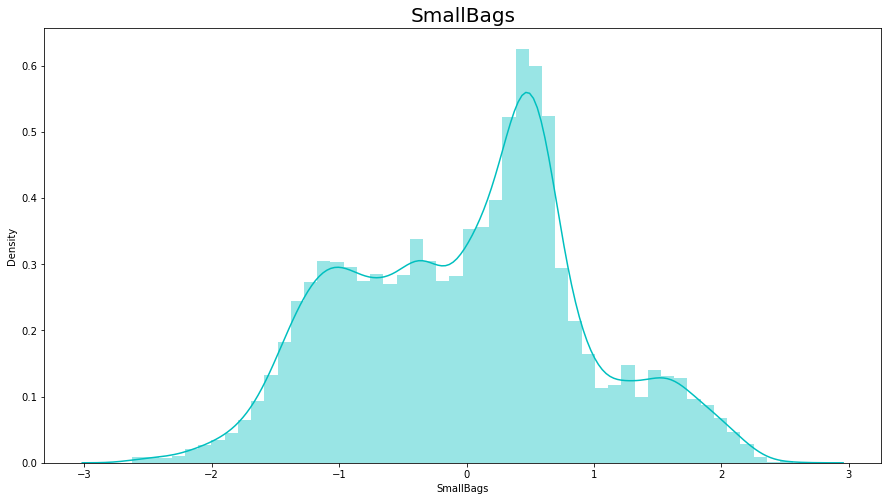

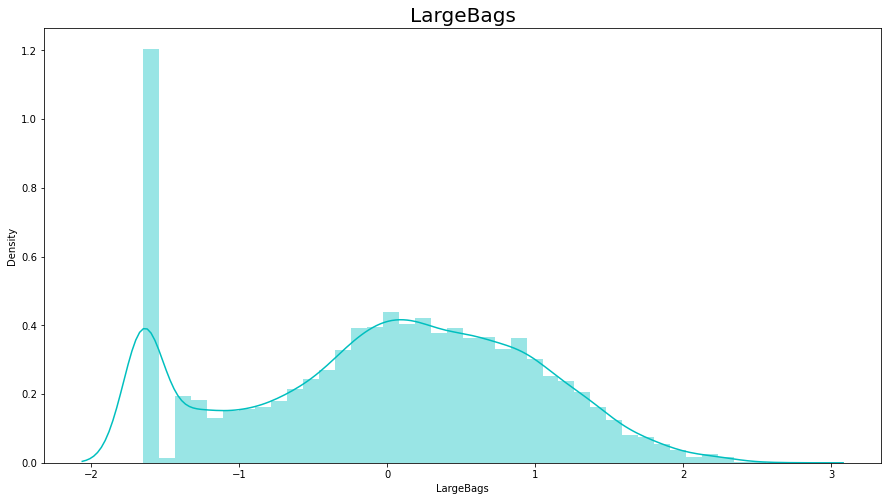

In [110]:
# for loop of distplot to check data distribution again
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.distplot(x[i], color = 'c')
    plt.title(i, fontsize = 20)
    plt.show()

In [112]:
# resplitting the features and target variables
y = x['AveragePrice']
x = x.drop(columns = ['AveragePrice'])

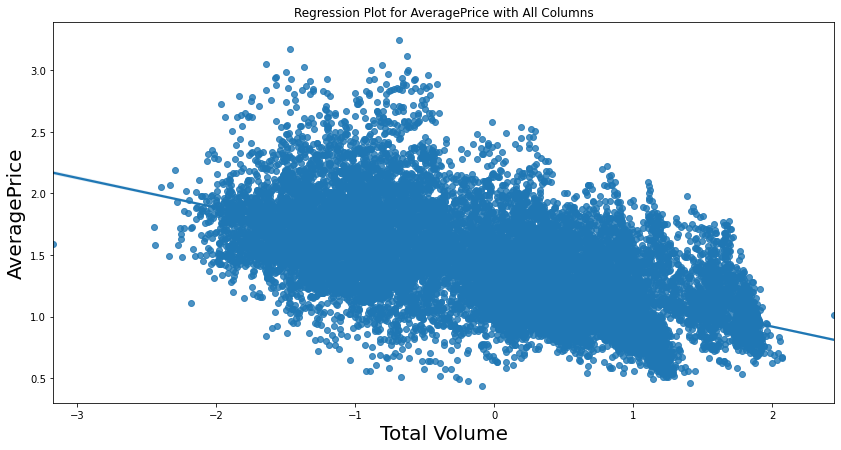

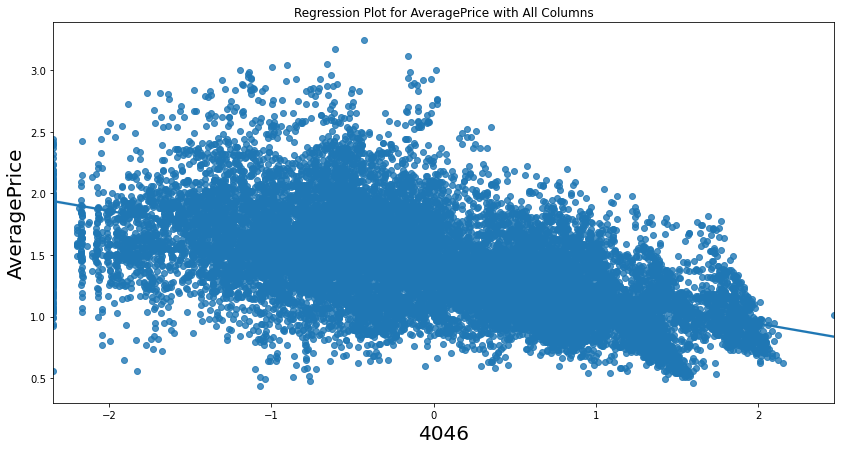

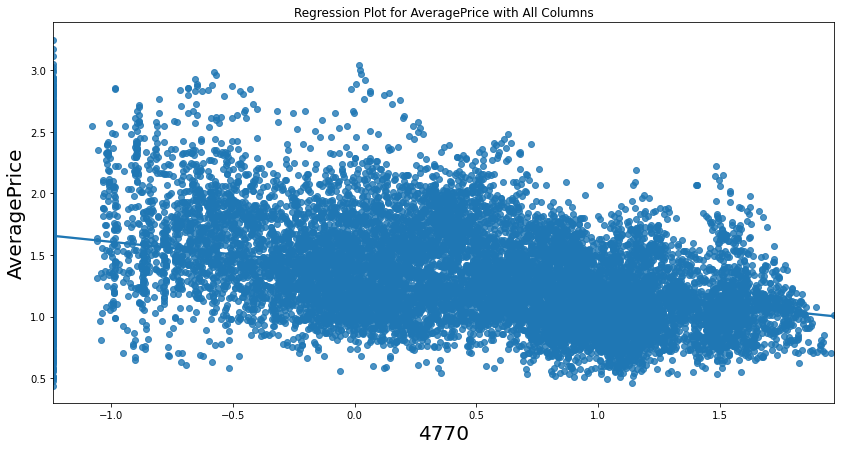

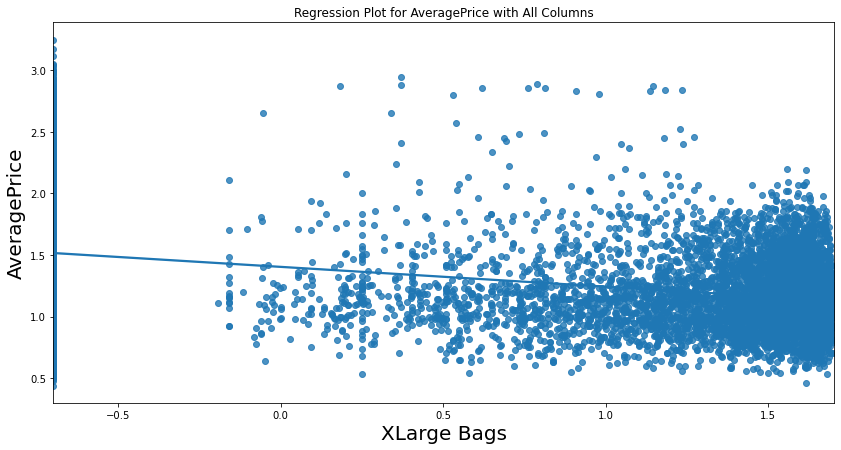

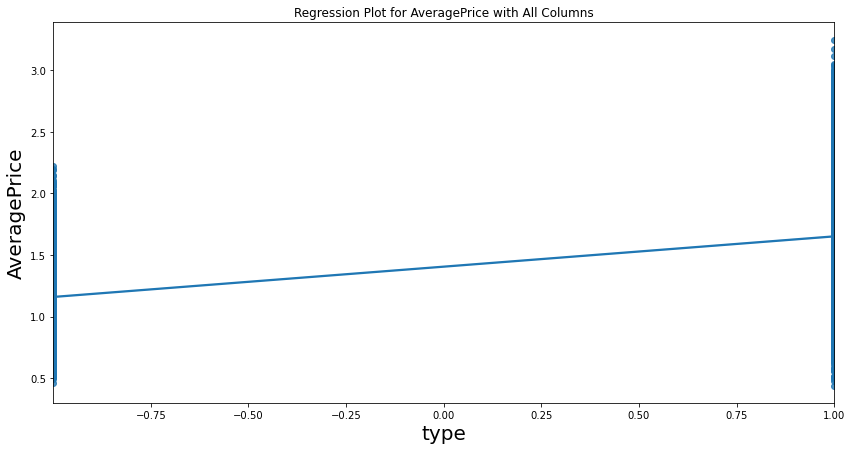

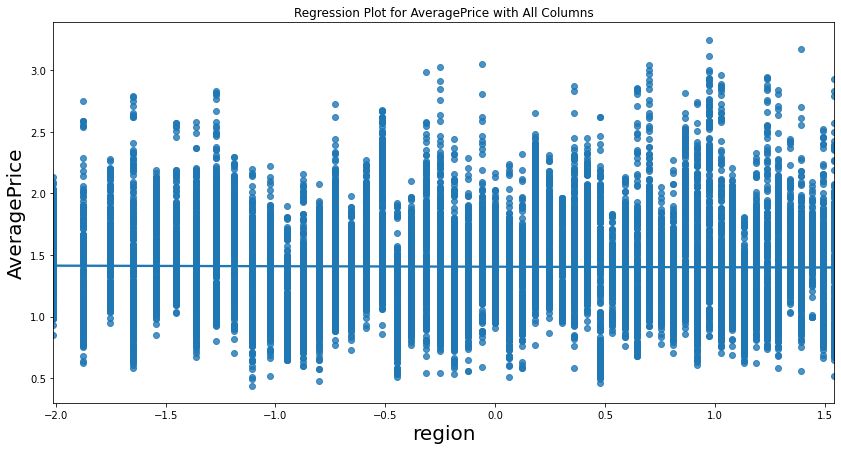

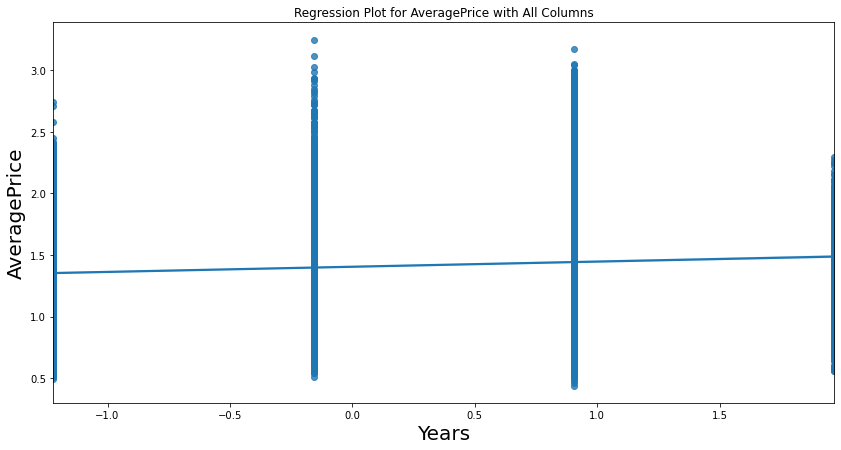

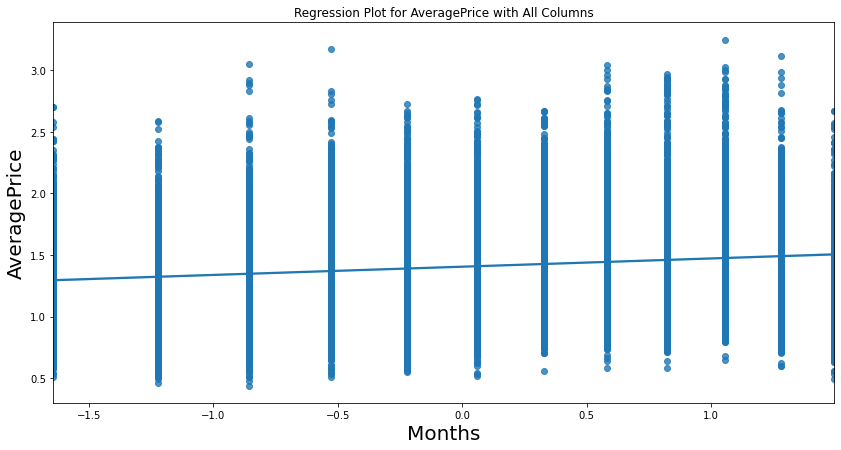

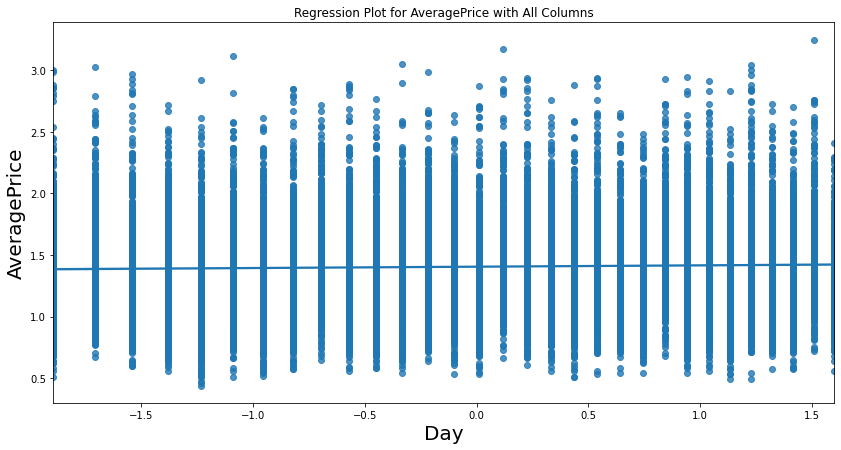

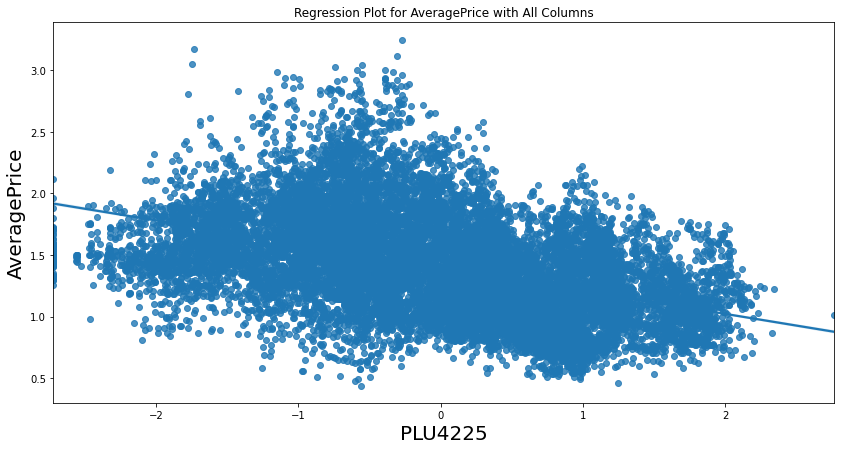

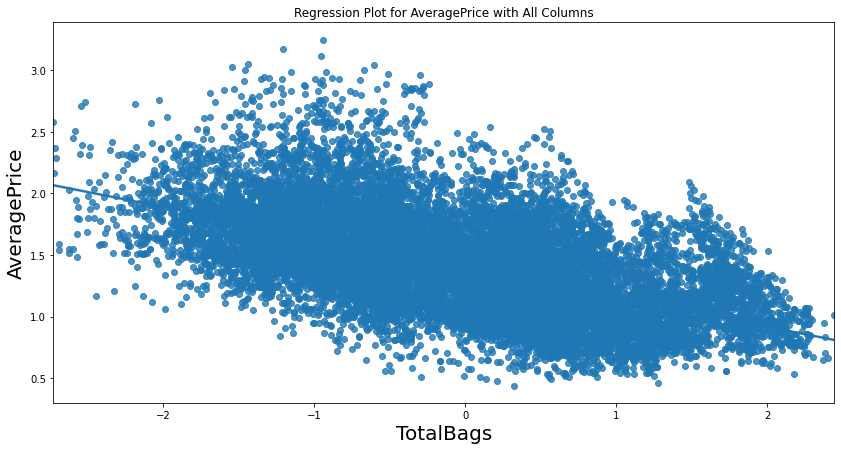

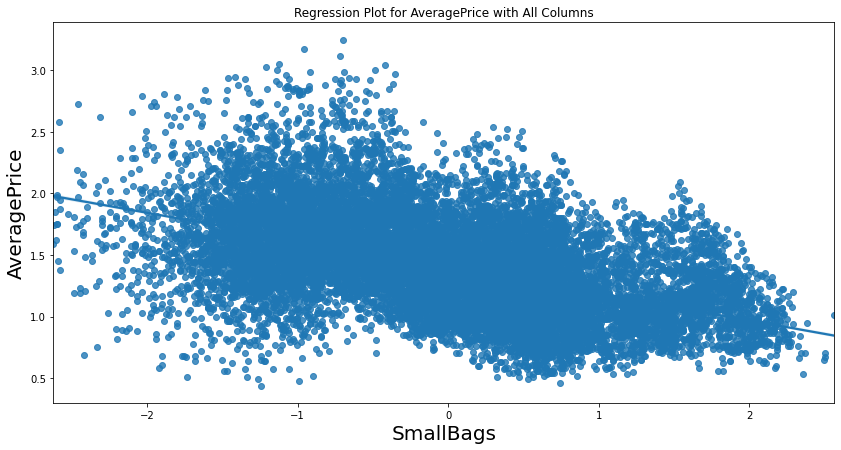

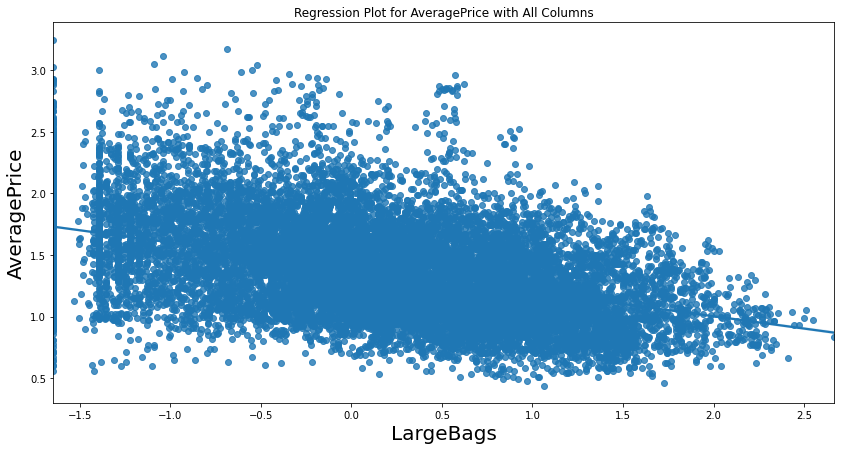

In [113]:
# for loop of regplot to check relation of features with target again
for i in x:
    plt.figure(figsize = (14,7))
    sns.regplot(x[i], y)
    plt.title('Regression Plot for AveragePrice with All Columns')
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('AveragePrice', fontsize = 20)
    plt.show()

We have done with removing outliers and skewness from the data and now we can see that none of feature columns have outliers and also distribution of the data is also sorted. We have also plot the regplot to see the relationship between features and target and it has been improved compared to previous plot.

Now our EDA part here ends our data is pretty much ready for model building. We will start the model building with some preprocessing from right here.

# Preprocessing
### Scaling

In [114]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Feature data has been scaled

# Finding Best Random State.

In [118]:
max_accu = 0
best_rs = 0

for i in range(0,2000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred_LR = LR.predict(x_test)
    accuracy = r2_score(y_test, y_pred_LR)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Maximum accuracy is ', max_accu, 'at random state ', best_rs)

Maximum accuracy is  0.5914757367272339 at random state  819


We found the best random state 819 with the accuracy score 59.14%. Accuracy score is too low even at the best random state. we will regularize th model to see if we can get the better accuracy score.

### Creating train_test_split.

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 819)

# Model Building.

## Model 1 Linear Regression

In [128]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
print('Training Score ', LR.score(x_train, y_train))
print('Test Score ', LR.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_LR))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_LR))

Training Score  0.561755378985332
Test Score  0.5914757367272339
Prediction r2_score is  0.5914757367272339
Mean Squared Error is  0.0690344561687621


### Regularization of the model

#### Lasso Regression

In [130]:
lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train, y_train)
alpha = lassocv.alpha_
print(' Alpha for Lasso is ',alpha)

 Alpha for Lasso is  2.652561568388775e-06


In [131]:
Lasso_reg = Lasso(alpha)
Lasso_reg.fit(x_train, y_train)
y_pred_lasso = Lasso_reg.predict(x_test)
print('Training Score ', Lasso_reg.score(x_train, y_train))
print('Test Score ', Lasso_reg.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_lasso))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_lasso))

Training Score  0.5617553723342308
Test Score  0.5914739496443211
Prediction r2_score is  0.5914739496443211
Mean Squared Error is  0.06903475815889609


Regularization of linear regression with lasso regression has no effect both the linear and lasso are giving the same score. we will see this by Ridge regression as well.

#### Ridge Regression.

In [133]:
ridgecv = RidgeCV(alphas = np.arange(0.000001,0.5,0.00001), normalize = True)
ridgecv.fit(x_train, y_train)
alpha2 = ridgecv.alpha_
print('Alpha for Ridge is ', alpha)

Alpha for Ridge is  2.652561568388775e-06


In [134]:
Ridge_reg = Ridge(alpha2)
Ridge_reg.fit(x_train, y_train)
y_pred_ridge = Ridge_reg.predict(x_test)
print('Training Score ', Ridge_reg.score(x_train, y_train))
print('Test Score ', Ridge_reg.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_ridge))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_ridge))

Training Score  0.5617553789853273
Test Score  0.5914757349222168
Prediction r2_score is  0.5914757349222168
Mean Squared Error is  0.06903445647378281


LinearRegression, LassoRegression and RidgeRegression has given the same score. We will build Polinomial regression using the linear regression again to see if we can get the better score or not. that we will use some other models as well. DecisionTreeRegressor and RandomForestRegressor and Support Vector Regressor.

## Model 2 Polynomial Regression.

In [158]:
poly_features = PolynomialFeatures(degree = 3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

In [159]:
LR = LinearRegression()
LR.fit(x_train_poly, y_train)
y_pred_poly = LR.predict(x_test_poly)
print('Training Score ', LR.score(x_train_poly, y_train))
print('Test Score ', LR.score(x_test_poly, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_poly))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_poly))

Training Score  0.7902139737605626
Test Score  0.773986060309115
Prediction r2_score is  0.773986060309115
Mean Squared Error is  0.03819295649204046


Polynomial regression at degree 3 is giving the better score(77.39%) than Linear, Lasso and Ridge Regression.

## Model 3 Support Vector Regressor.

In [160]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print('Training Score ', svr.score(x_train, y_train))
print('Test Score ', svr.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_svr))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_svr))

Training Score  0.7991923317603685
Test Score  0.7805032454214496
Prediction r2_score is  0.7805032454214496
Mean Squared Error is  0.03709165022842504


Support vector regressor has given till the highest score 78.05%

## Model 4 Decision Tree Regressor

In [168]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)
print('Training Score ', DT.score(x_train, y_train))
print('Test Score ', DT.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_dt))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_dt))

Training Score  1.0
Test Score  0.7403647056078604
Prediction r2_score is  0.7403647056078604
Mean Squared Error is  0.043874459761549925


DecisionTreeRegressor is giving 74.03% not bad.

## Model - 5 Random Forest Regressor.

In [203]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
print('Training Score ', RF.score(x_train, y_train))
print('Test Score ', RF.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_rf))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_rf))

Training Score  0.9834714352844749
Test Score  0.8861926924733855
Prediction r2_score is  0.8861926924733855
Mean Squared Error is  0.019231723276825628


From all the 5 models Random Forest has given the highest score 88.43%

We have built 7 Regression Machine Learning Algorithm out of which 2 are regularization models and there score is as follows:-

 * **LinearRegression Model**  r2_Score = ```0.5914757367272339```
 * **LassoRegression Model**  r2_Score = ```0.5914739496443211```
 * **RidgeRegression Model**  r2_Score = ```0.5914757349222168```
 * **PolynomialRegression Model**  r2_Score = ```0.773986060309115```
 * **SupportVectorRegressor Model**  r2_Score = ```0.7805032454214496```
 * **DecisionTreeRegressor Model**  r2_Score = ```0.7403647056078604```
 * **RandomForestRegressor Model**  r2_Score = ```0.8843572084521765```
 
All the 7 models have given the accuracy score very differently, out of which the RandomForest has given the highest r2_score that is 88.43% and LassoRegression has given the lowest score that is 59.1473%. 

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model.

# Cross Validation of the models

In [196]:
# cross validation score for the linear regression
cvs = cross_val_score(LR, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Linear Regression is ", cvs.mean())

Average Cross Validation Score of Linear Regression is  0.1640467501751814


In [195]:
# cross validation score for the Lasso regression
cvs = cross_val_score(Lasso_reg, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Lasso Regression is ", cvs.mean())

Average Cross Validation Score of Lasso Regression is  0.16405930710472047


In [194]:
# cross validation score for the Ridge regression
cvs = cross_val_score(Ridge_reg, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Ridge Regression is ", cvs.mean())

Average Cross Validation Score of Ridge Regression is  0.16404675320826553


In [193]:
# cross validation score for the Polinomial regression
cvs = cross_val_score(LR, poly_features.fit_transform(x_scaled), y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Polynomial Regression is ", cvs.mean())

Average Cross Validation Score of Polynomial Regression is  -5.011559338746735e+18


In [192]:
# cross validation score for the support vector regressor
cvs = cross_val_score(svr, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Support Vector Regressor is ", cvs.mean())

Average Cross Validation Score of Support Vector Regressor is  -741728.6914529558


In [191]:
# cross validation score for the Decision Tree regressor
cvs = cross_val_score(DT, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Decision Tree Regressor is ", cvs.mean())

Average Cross Validation Score of Decision Tree Regressor is  -0.2461103523107842


In [187]:
# cross validation score for the Random Forest regressor
cvs = cross_val_score(RF, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Random Forest Regressor is ", cvs.mean())

Average Cross Validation Score of Random Forest Regressor is  0.3516685737400008


All of model's cross validation score is very poor Polynomial regression, support vector regressor and decision tree are giving highly negative cross validation score polynomial regression is worst of worst.

whereas Linear, Lasso, Ridge and Random Forest has positive cross validation score but that too is very low. out of these random Forest has given the highest cross validation score. We will hypertune the Random Forest Model.

# Hyper Parameter Tuning

In [197]:
params = {'n_estimators' : [50,100,150],
          'max_depth' : [2,4,6],
          'min_samples_split' : [2,5,8],
          'min_samples_leaf' : [1,2,3],
          'max_features' : ['auto', 'sqrt', 'log2']
          }

In [198]:
grid_search = GridSearchCV(RF, param_grid = params, verbose = 2, n_jobs = 4)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [199]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [201]:
RFHT = grid_search.best_estimator_
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
print('Training Score ', RF.score(x_train, y_train))
print('Test Score ', RF.score(x_test, y_test))
print('Prediction r2_score is ', r2_score(y_test, y_pred_rf))
print('Mean Squared Error is ', mean_squared_error(y_test, y_pred_rf))

Training Score  0.6986081109021107
Test Score  0.6892986630791895
Prediction r2_score is  0.6892986630791895
Mean Squared Error is  0.05250385290068852


In [202]:
# cross validation score for the Random Forest regressor
cvs = cross_val_score(RFHT, x_scaled, y, cv = 10, scoring = 'r2')
print("Average Cross Validation Score of Random Forest Regressor is ", cvs.mean())

Average Cross Validation Score of Random Forest Regressor is  0.19102097285508327


Hyper Tuned Random Forest Model is giving less accuracy than the simple Random Forest model we build earlier so we are going to save the same Model.

# Model Saving

In [204]:
file_name = 'Avocado Use case-AveragePrice Prediction.pickle'
pickle.dump(RF,open(file_name,'wb'))

Model has been saved successfully.

## Loading and Predicting with the Loaded Model

In [205]:
loaded_model = pickle.load(open(file_name,'rb'))
Predictions = loaded_model.predict(x_test)

In [206]:
Actual = y_test

## Conclusion

In [207]:
DF = pd.DataFrame([Predictions, Actual], index = ['Predictions', 'Actual'])
DF

0       1       2       3       4      5       6       7     \
Predictions  0.9334  1.2367  1.7947  1.5742  1.3635  1.768  1.7132  1.5175   
Actual       0.9900  1.1900  1.6900  1.4400  1.0100  1.840  1.9300  1.4800   

               8      9     ...    5358    5359   5360    5361    5362  \
Predictions  1.5138  2.144  ...  1.1379  1.2214  0.976  1.0773  1.5071   
Actual       1.5400  2.370  ...  1.0700  1.2700  0.680  1.0300  1.5000   

               5363    5364    5365    5366    5367  
Predictions  1.9514  1.3185  1.0624  1.2289  2.3181  
Actual       2.0000  1.2300  1.0000  1.2100  2.3400  

[2 rows x 5368 columns]

# Finished

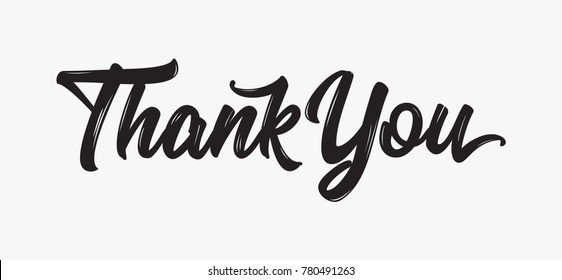